# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1** - Abhishek Rathore


# **Project Summary -**

This project's objective was to examine a dataset of credit card defaults and create a prediction model to locate probable defaulters. The dataset contained data on credit card holders, such as demographics, trends of credit card use, and payment history.

I started by investigating the data and cleaning and organizing it.  Renamed several columns, such as PAY_0 to PAY_1, and Is_defulter for default payment the next month, etc.

In order to understand the data and show the links between different characteristics and the target variable, I then did exploratory data analysis. We discovered that factors including credit limit, payment history, and age were significant default predictors.

I then performed a hypothesis test to confirm my EDA results. To determine if females are more prone than males to miss payments, I utilized the two-sample z-test for proportions. In order to determine if the average credit limit for defaulters is lower than the average credit limit for non-defaulters, I also conducted a two-sample t-test. The outcomes of these tests supported my EDA findings.

Afterward, data pre-processing was done. Handling missing values, removing pointless columns, and translating features to feature selection based on !correlation and VIF factor were all part of this process. By oversampling the minority class with the SMOTE approach, I was able to address the target variable's class imbalance as well.

Then, I trained a number of machine learning models, including logistic regression, decision trees, random forests,XGBoost and K nearest neighbour ,and assessed their effectiveness using metrics like recall, accuracy, and F1 scores. To enhance model performance, we also performed cross-validation and hyperparameter adjustment.

I chose the XGBoost model, which had the greatest performance, and used it to estimate the likelihood that new credit card users will fail on their payments.





 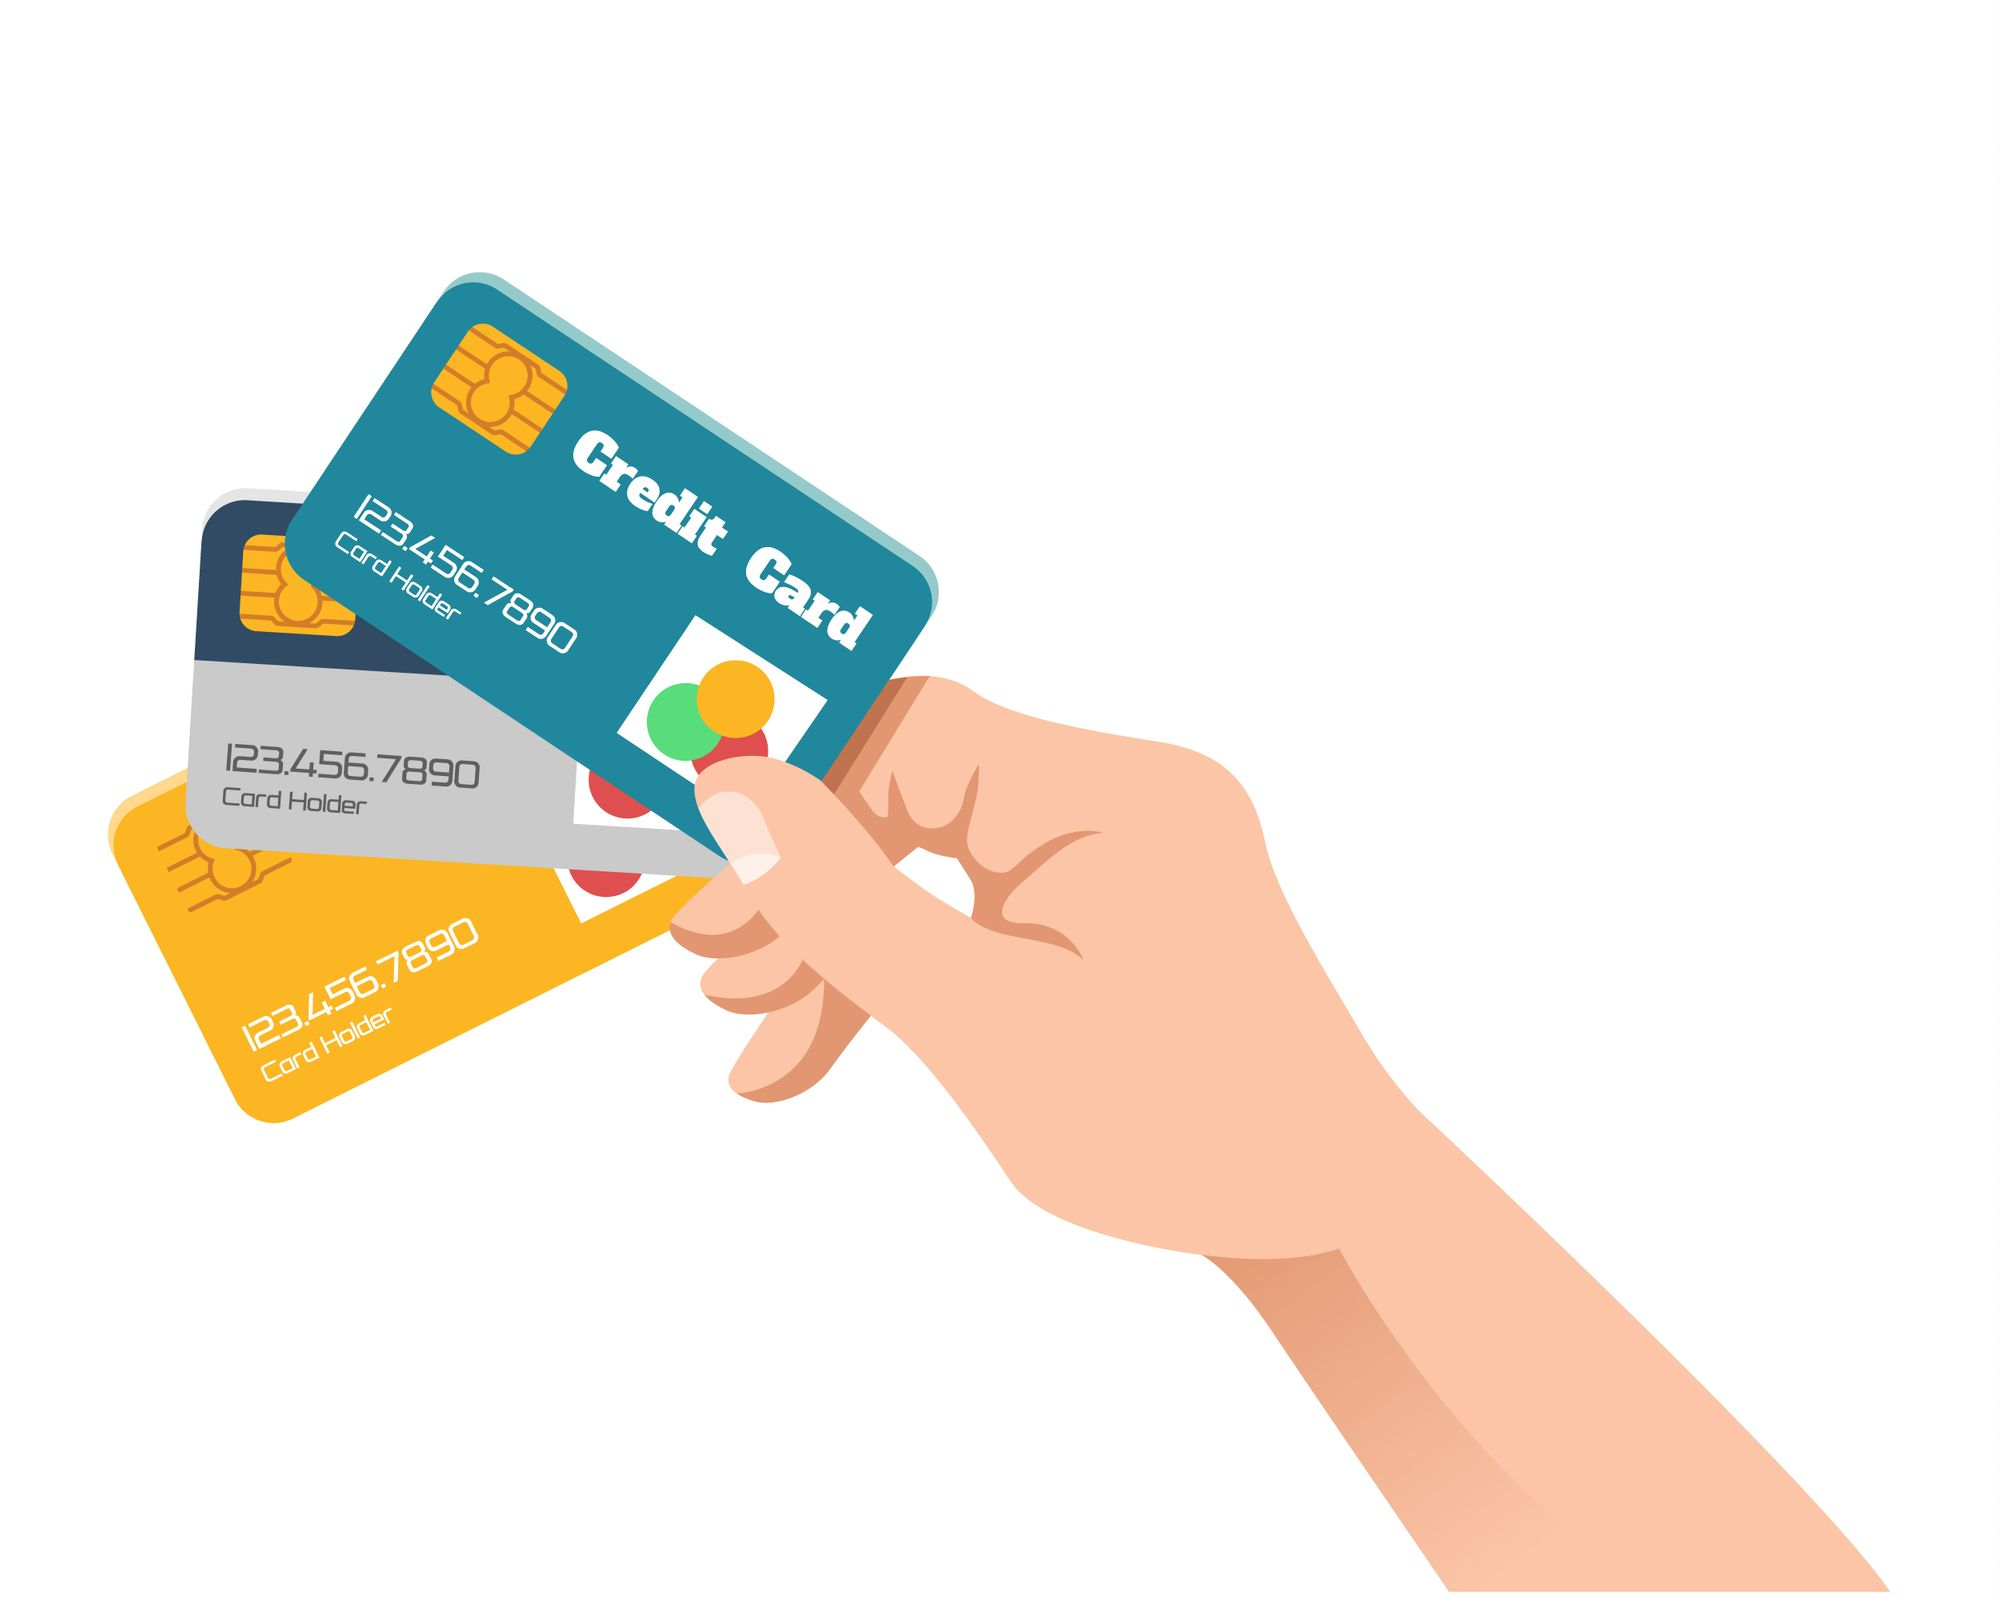


# **GitHub Link -**

Provide your GitHub Link here. (https://github.com/Abhishek6481/Credit-card-default-prediction-)

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

# libraries to do statistical analysis and tests
import scipy
from statsmodels.stats.proportion import proportions_ztest

# libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# libraries for performance analysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_auc_score, confusion_matrix, roc_curve, auc

# ML model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
# Hypermeter technique libraries
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# libraries for model interpretation
!pip install shap==0.40.0
import shap
import graphviz

import pickle

sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=515069 sha256=32723db1432e0c2641fd86cdad8bd936591e88034cbf1d914b7850f8944277f9
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data set
Credit_cf = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xls')

### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
Credit_cf.head() # Top 5 rows of our dataset.

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
# Check the how many raws and columns in our data set.
print(f'Creidt_Card = {Credit_cf.shape[0]} Rows , {Credit_cf.shape[1]} columns.')

Creidt_Card = 30000 Rows , 25 columns.


### Dataset Information

In [ ]:
# Dataset Info
Credit_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
# Check Duplicate values
Credit_cf.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
# Check Missing/null values
Credit_cf.isnull().sum().sort_values(ascending = False)

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default payment next month    0
dtype: int64

In [ ]:
# Visualizing the missing values

In [ ]:
# Visualize missing/values
import missingno as msno

<Axes: >

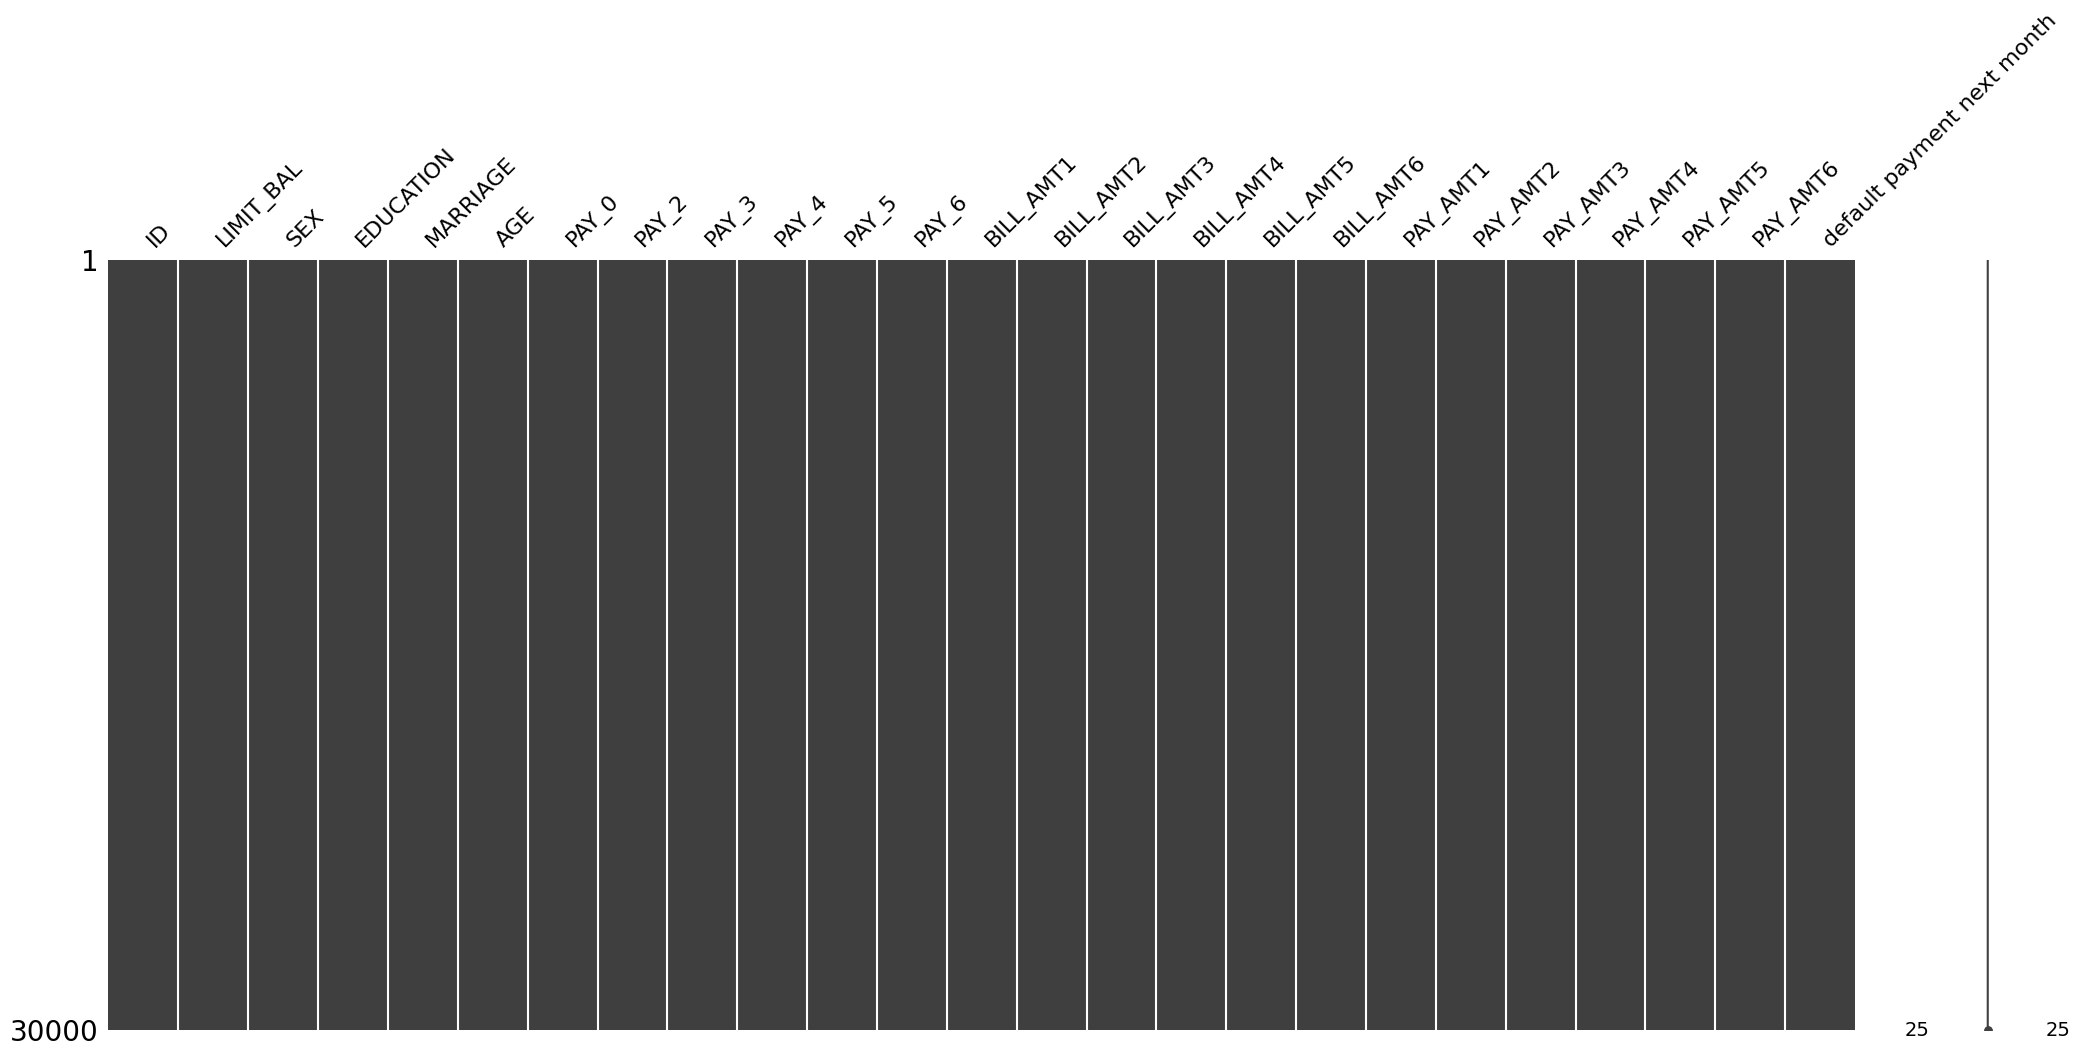

In [ ]:
# using matrix bar chart
msno.matrix(Credit_cf)

### What did you know about your dataset?

In our Credit card default data set have no null Values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
Credit_cf.keys()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe

In [ ]:
Credit_cf.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

### Variables Description

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1 = male, 2 = female)

* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

* AGE: Age in years
* **Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, 3 = payment delay for three months,.... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

In [ ]:
for col in Credit_cf.columns:
  if col in []:
    continue
  else:
      print(f'The unique values in column {col} are' ,Credit_cf[col].unique() )

The unique values in column ID are [    1     2     3 ... 29998 29999 30000]
The unique values in column LIMIT_BAL are [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
The unique values in column SEX are [2 1]
The unique values in column EDUCATION are [2 1 3 5 4 6 0]
The unique values in column MARRIAGE are [1 2 3 0]
The unique values in column AGE are [24 26 34 37 57 29 23 28 35 51 41 30

In [ ]:
Credit_cf.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
# Rename some columns for Better Understanding
Credit_cf.rename(columns ={'default payment next month' : 'Is_defulter'},inplace = True) # change name defult payment to Is_defuter
# name change according to months
Credit_cf.rename(columns = {'PAY_0' : 'Pay_sep', 'PAY_2' : 'Pay_aug','PAY_3': 'Pay_jul','PAY_4':'Pay_Jun','PAY_5':'Pay_may' , 'PAY_6': 'Pay_Apr'},inplace = True) # name change according to months
# Rename the bill amount
Credit_cf.rename(columns = {'BILL_AMT1':'Bill_amt_sept','BILL_AMT2':'Bill_amt_aug','BILL_AMT3':'Bill_amt_jul','BILL_AMT4':'Bill_amt_jun','BILL_AMT5' : 'Bill_amt_may','BILL_AMT6': 'Bill_amt_apr'},inplace = True)
# Rename the payment amount
Credit_cf.rename(columns={'PAY_AMT1':'Pay_amt_sept','PAY_AMT2':'Pay_amt_aug','PAY_AMT3':'Pay_amt_jul','PAY_AMT4':'Pay_amt_jun','PAY_AMT5':'Pay_amt_may','PAY_AMT6':'PAY_amt_apr'},inplace=True)

Education

In [ ]:
# Check how many values in Eduction
Credit_cf['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [ ]:
fill = (Credit_cf['EDUCATION'] == 5) | (Credit_cf['EDUCATION'] == 6) | (Credit_cf['EDUCATION'] == 0)
Credit_cf.loc[fill,'EDUCATION'] = 4
Credit_cf['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

As we can see from the dataset, there are numbers like 5, 6, and 0 for which there is no explanation, thus we can add them together to make 4, or Others.

Marriage

In [ ]:
# Check how many value in marriage
Credit_cf['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

1 = married , 2 = single , 3 = others

In [ ]:
M_fill = (Credit_cf['MARRIAGE'] == 0)
Credit_cf.loc[M_fill , 'MARRIAGE'] = 3
Credit_cf['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

A couple of the values for 0 are undetermined. I've added them to the Others category.

In [ ]:
Credit_cf.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  Pay_sep  Pay_aug  Pay_jul  \
0   1      20000    2          2         1   24        2        2       -1   
1   2     120000    2          2         2   26       -1        2        0   
2   3      90000    2          2         2   34        0        0        0   
3   4      50000    2          2         1   37        0        0        0   
4   5      50000    1          2         1   57       -1        0       -1   

   Pay_Jun  ...  Bill_amt_jun  Bill_amt_may  Bill_amt_apr  Pay_amt_sept  \
0       -1  ...             0             0             0             0   
1        0  ...          3272          3455          3261             0   
2        0  ...         14331         14948         15549          1518   
3        0  ...         28314         28959         29547          2000   
4        0  ...         20940         19146         19131          2000   

   Pay_amt_aug  Pay_amt_jul  Pay_amt_jun  Pay_amt_may  PAY_amt_apr  \
0          689            0            0            0            0   
1         1000         1000         1000            0         2000   
2         1500         1000         1000         1000         5000   
3         2019         1200         1100         1069         1000   
4        36681        10000         9000          689          679   

   Is_defulter  
0            1  
1            1  
2            0  
3            0  
4            0  

[5 rows x 25 columns]

### What all manipulations have you done and insights you found?

* First we rename  column name for understand the all features like default payment next month to Is_defulter, Pay_0 to pay_6 to all the number replace to month like bill amt 1 to bill_amt_6 and pay_amt1 to Pay_6 and these feature also.
* The dataset, there are numbers like 5, 6, and 0 for which there is no explanation, thus we can add them together to make 4, or Others.
* A couple of the values for 0 are undetermined. I've added them to the Others category.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

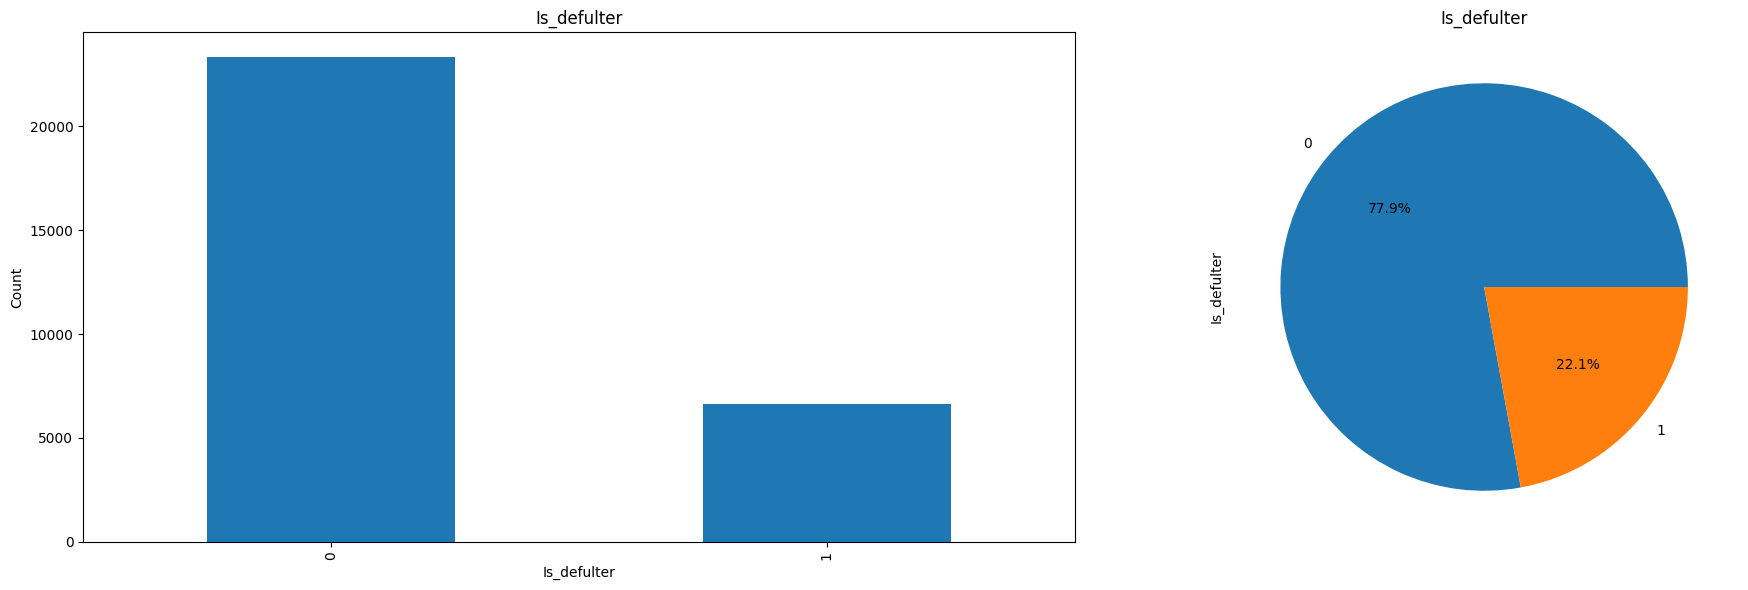

In [ ]:
# first bar chart
# pie chart
# Check how many defaulter and non defaulter.
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
ax = Credit_cf['Is_defulter'].value_counts().plot(kind='bar',title="Is_defulter",ax=axes[0])
Credit_cf['Is_defulter'].value_counts().plot(kind='pie',title="Is_defulter",autopct='%1.1f%%',ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Is_defulter")
fig.tight_layout()

##### 1. Why did you pick the specific chart?

We Pick the countplot because Countplot Shows Number of Dataset.

##### 2. What is/are the insight(s) found from the chart?

As we clearly see in the Countplot our data is Imbalance Data set.

0 is higher then 1

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Our data set is imbalanced Non defulter user value is high and defulter user value is low .

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

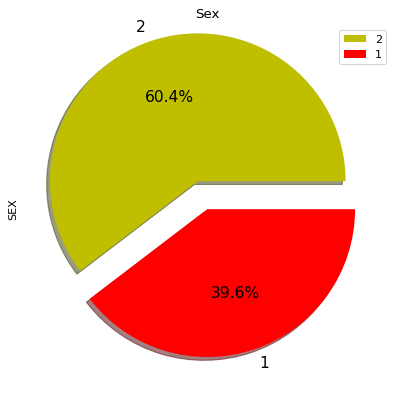

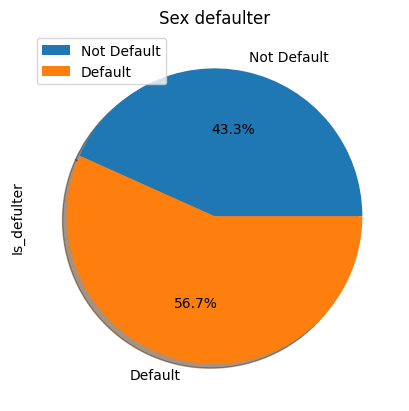

In [ ]:
# Check how many males or females are defaulter and non defaulter
plt.figure(figsize=(12,7), dpi=80)
Credit_cf['SEX'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode = (0.2, 0.0), colors = ['y','red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
plt.title("Sex")
fig=plt.gcf()
plt.legend(loc="best")
fig.set_size_inches(6,6)
plt.show()
Credit_cf.groupby("SEX")["Is_defulter"].sum().plot.pie(title='Sex defaulter', legend=True, autopct='%1.1f%%', labels=['Not Default','Default'], shadow=True)
plt.show()


##### 1. Why did you pick the specific chart?


pie chart: How many male and female use credit card.

Pie Chart: To get proportion of defaults for each sex.
  1 = male
  2  = female

##### 2. What is/are the insight(s) found from the chart?

There are more women than men in our dataset and apparently, men have a slightly higher rate of default compared to female

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It may not have a significant positive business impact

####Chart - 3

In [ ]:
# Chart - 3 visualization code

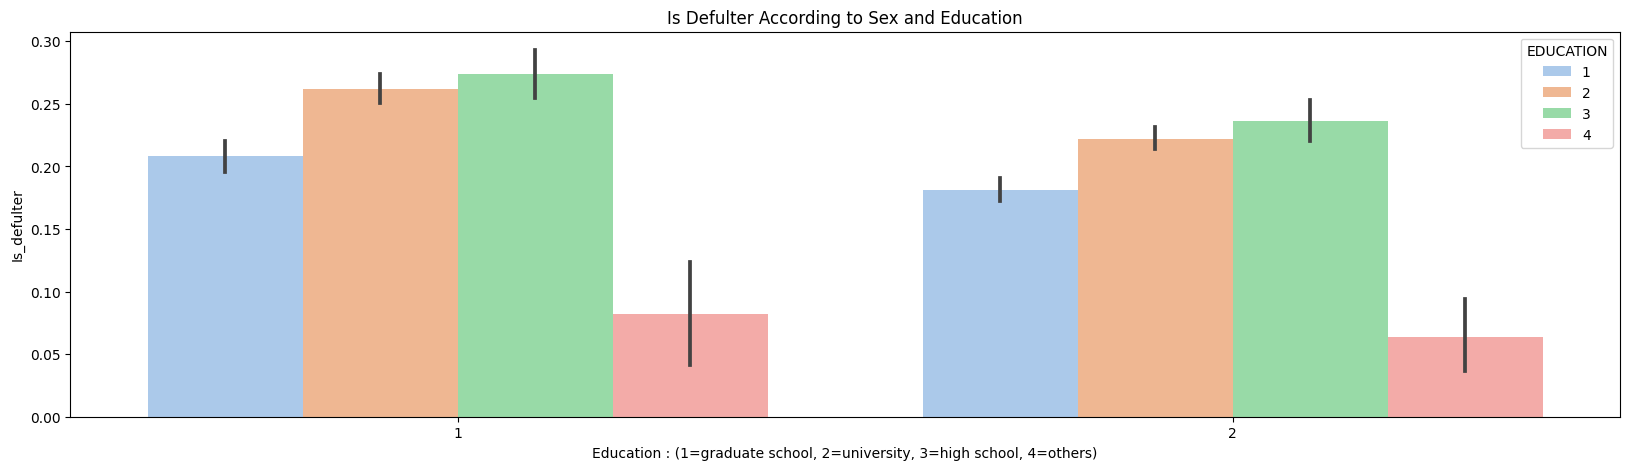

In [ ]:
# Using bar chart
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data= Credit_cf , x='SEX' , y = 'Is_defulter' ,hue = 'EDUCATION' , ax=ax , palette = 'pastel')
ax.set(title = 'Is Defulter According to Sex and Education')
plt.xlabel("Education : (1=graduate school, 2=university, 3=high school, 4=others)")
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart: To get proportion of defaults for clients by each education and sex

##### 2. What is/are the insight(s) found from the chart?

Default rate for High School educated clients is highest and Others category clients has lowest rate of default and High school of females more default than man.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

<Axes: xlabel='MARRIAGE', ylabel='count'>

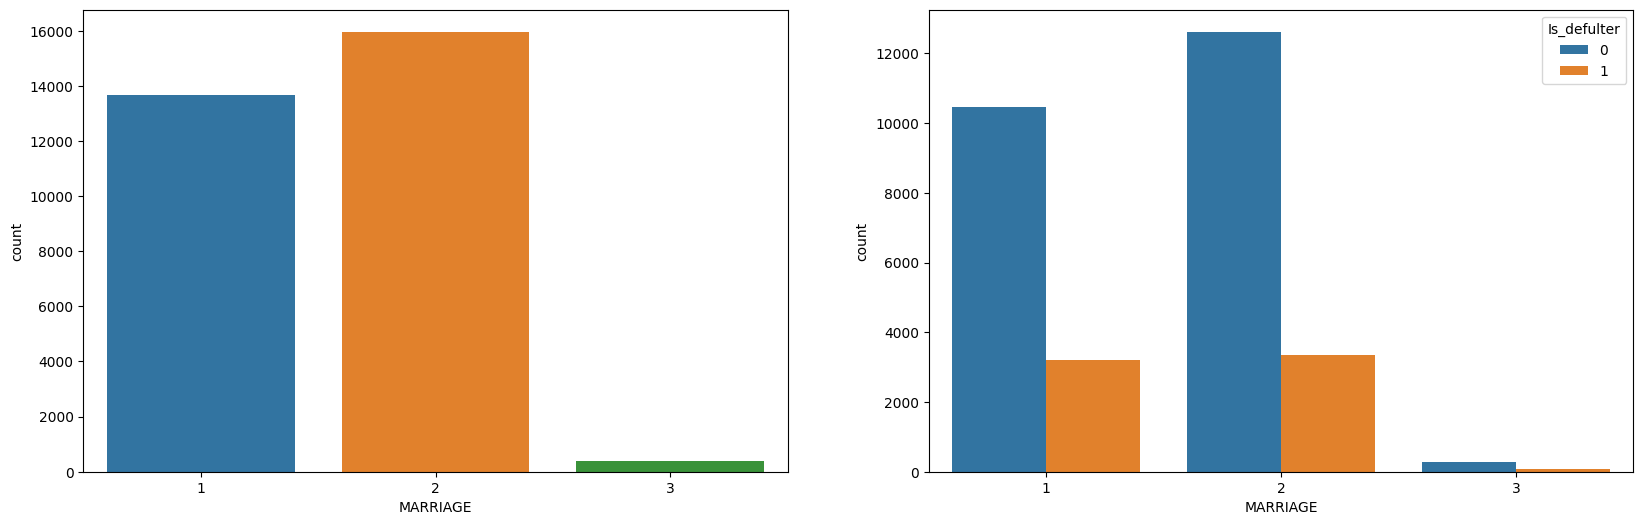

In [ ]:
# Using Bar chart
fig, axes  = plt.subplots(ncols=2,figsize = (20,6))
sns.countplot(x = 'MARRIAGE',ax = axes[0] ,data = Credit_cf)
sns.countplot (x ='MARRIAGE',hue = 'Is_defulter',ax= axes [1], data = Credit_cf )


##### 1. Why did you pick the specific chart?

Pie Chart: To get proportion of defaults for clients by each marriage.

##### 2. What is/are the insight(s) found from the chart?

Most people fall under Married and Single category with singles being highest.

The default rate in all the categories is almost same with in Others and Married clients

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

<Axes: xlabel='AGE', ylabel='count'>

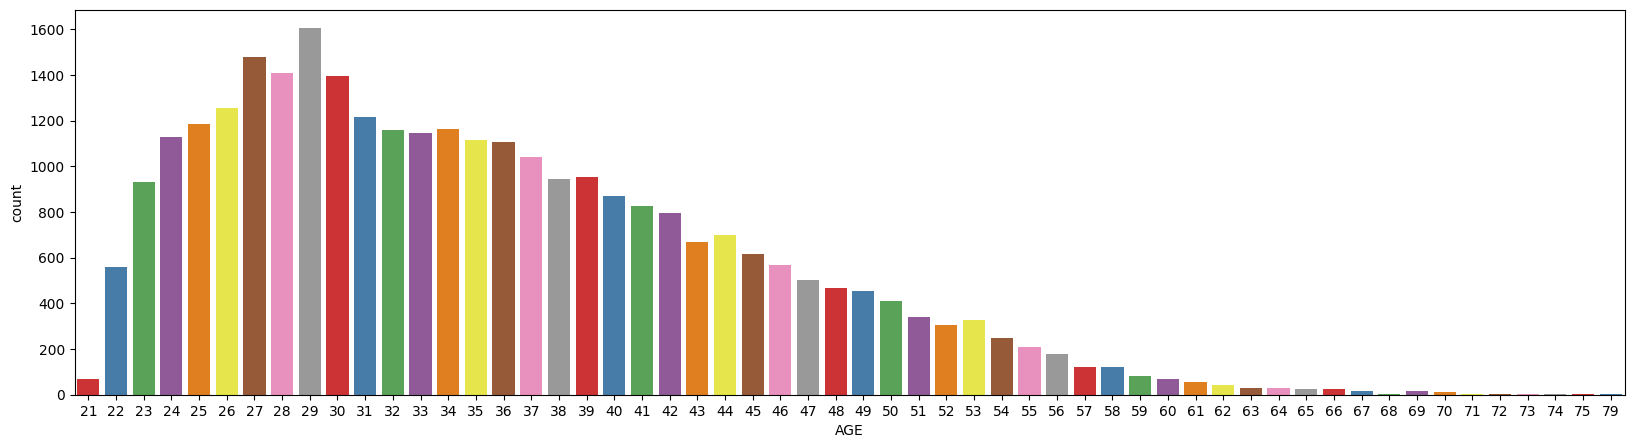

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'AGE', data = Credit_cf,palette= "Set1" )

<Axes: xlabel='AGE', ylabel='count'>

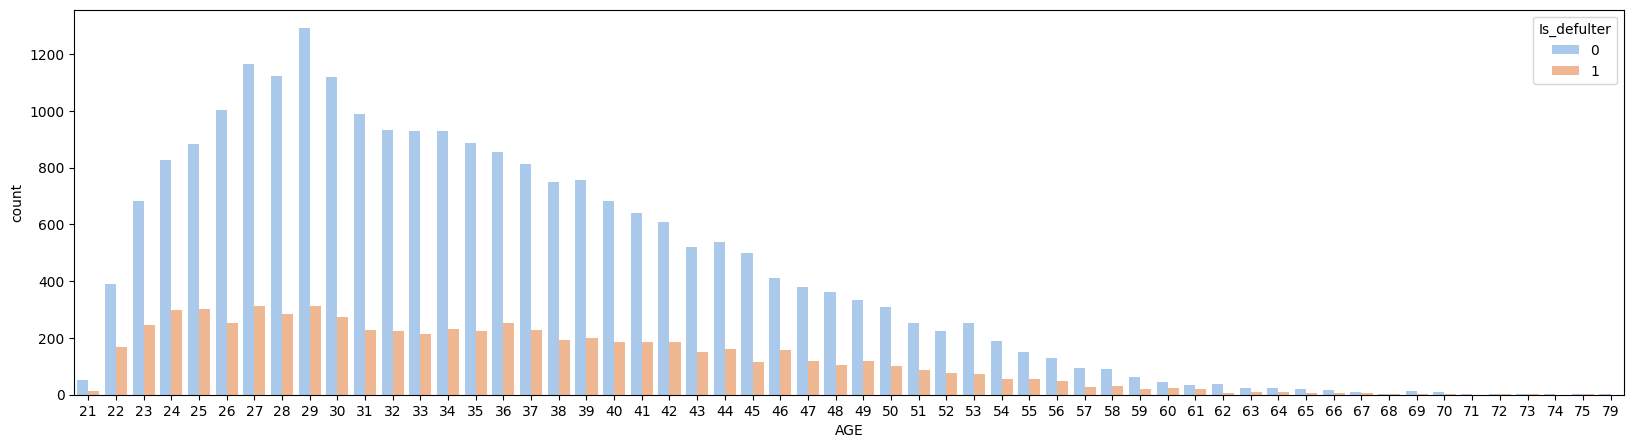

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'AGE' , hue = 'Is_defulter' , data = Credit_cf , palette = 'pastel')

##### 1. Why did you pick the specific chart?

To compare customer numbers by age

##### 2. What is/are the insight(s) found from the chart?

As compared to clients who are between the ages of 23 and 37, users and defrauders are more prevalent between those two ages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

In [ ]:
Credit_cf['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

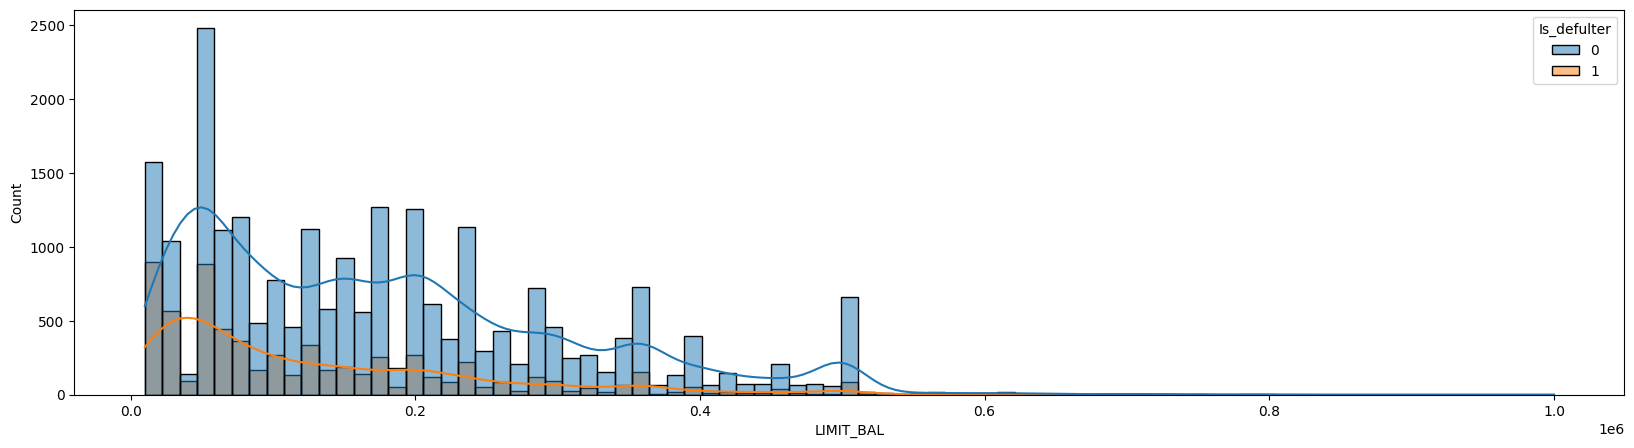

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(x = 'LIMIT_BAL', hue = 'Is_defulter' ,data = Credit_cf, kde = True)
plt.show()

##### 1. Why did you pick the specific chart?

Histogram to visualize distribution of LIMIT_BAL.

##### 2. What is/are the insight(s) found from the chart?

The distribution is right-skewed, as predicted, and the majority of clients have credit limits of 200k or less, with a higher rate of default in that range.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

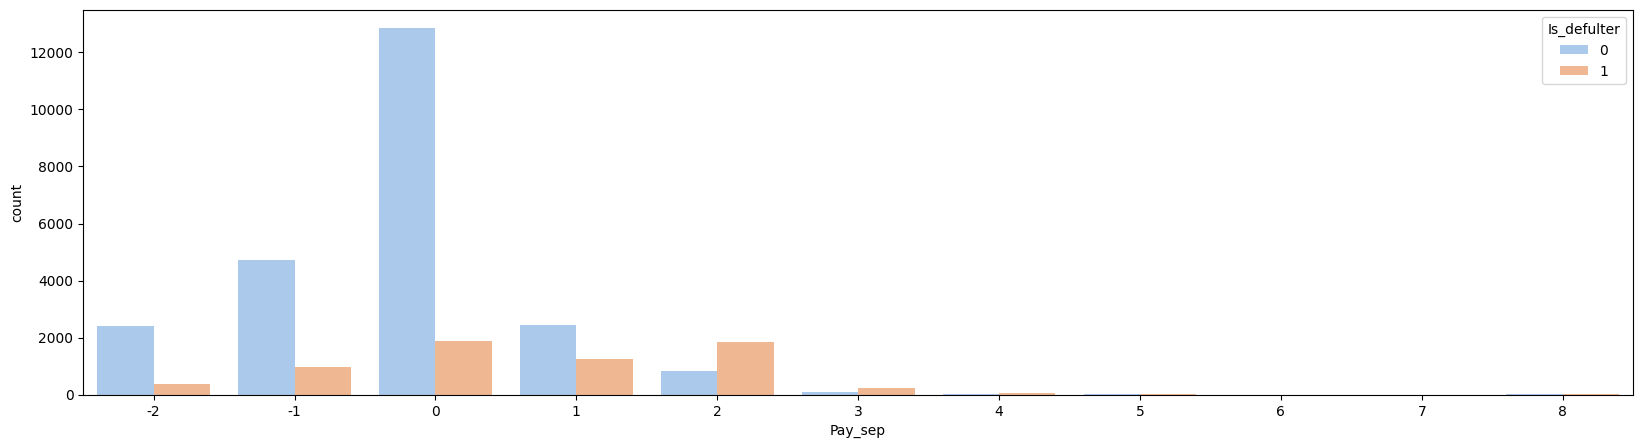

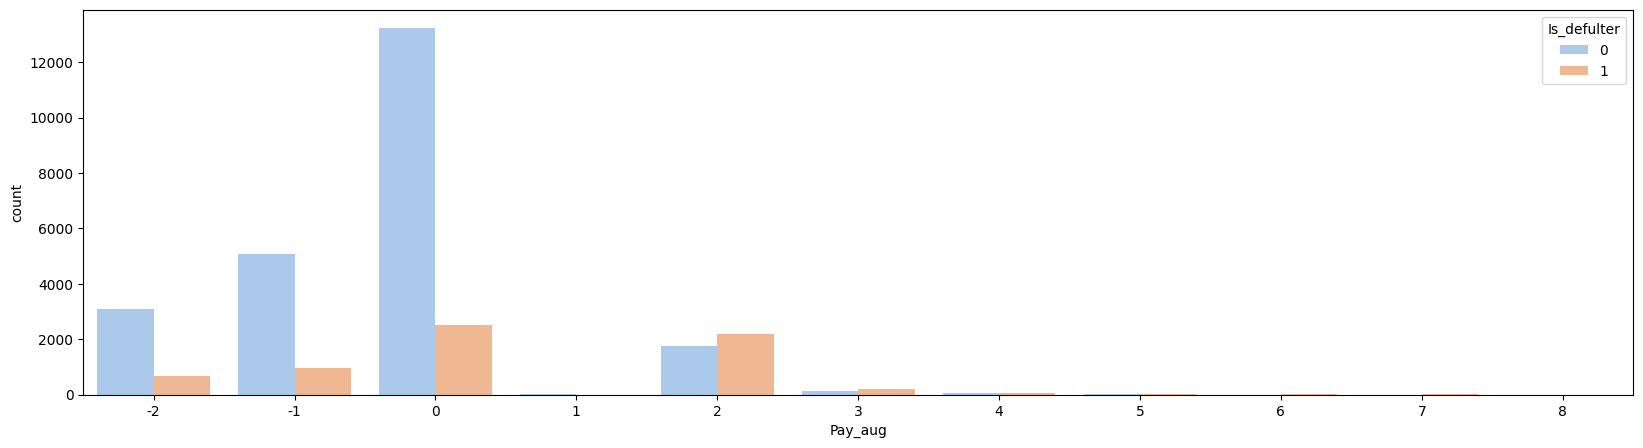

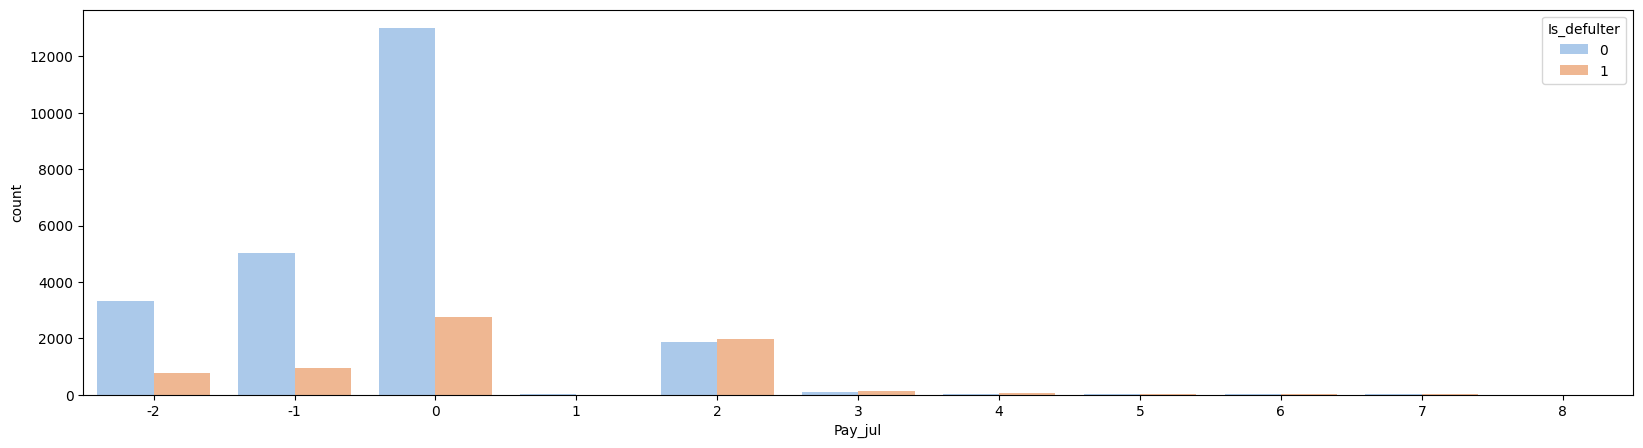

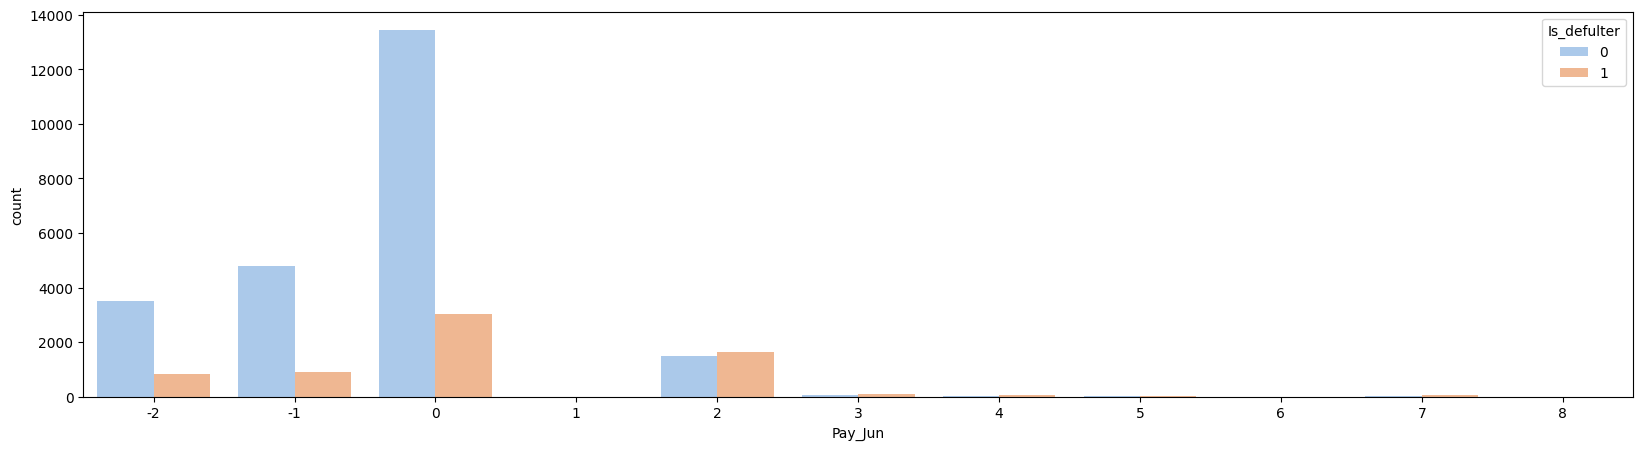

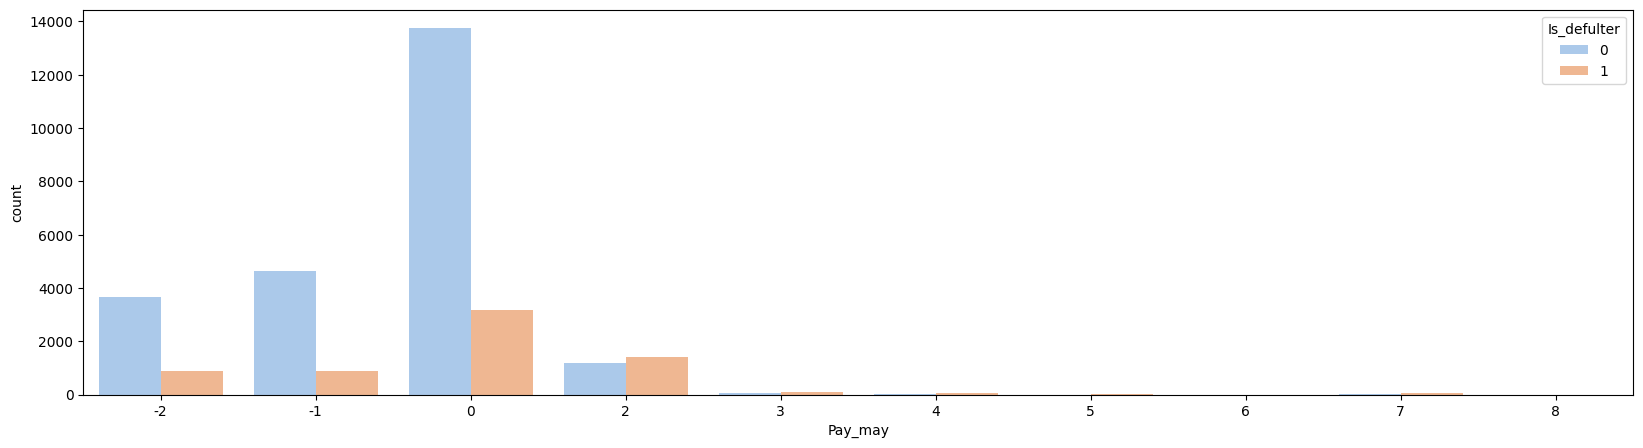

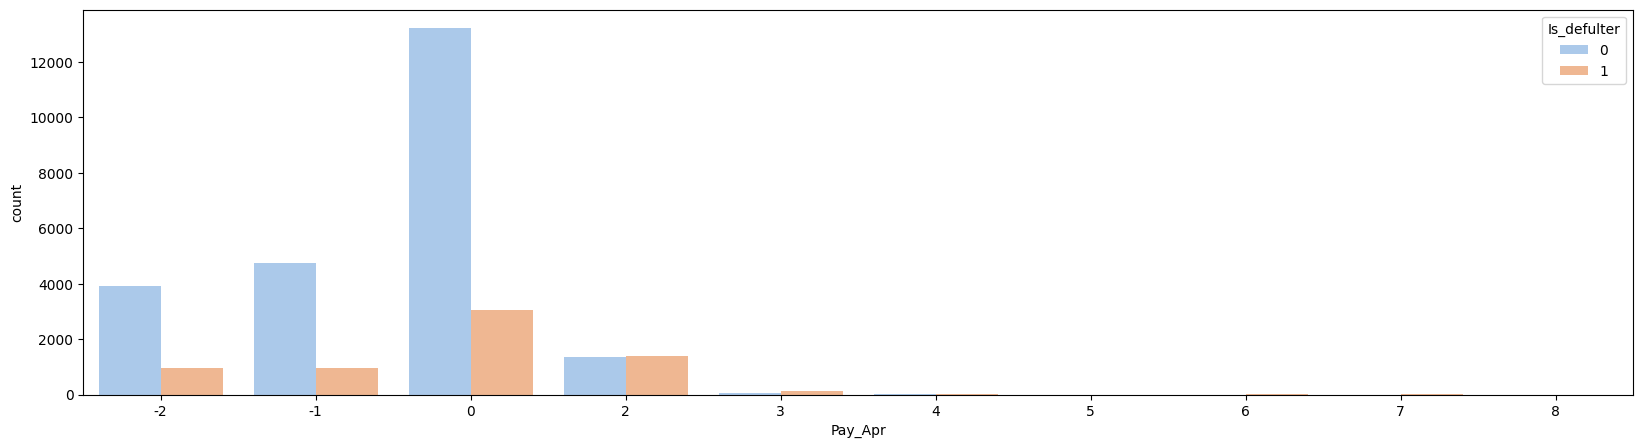

In [ ]:
Pay_col = ['Pay_sep',	'Pay_aug',	'Pay_jul','Pay_Jun' , 'Pay_may','Pay_Apr']
for col in Pay_col:
  plt.figure(figsize = (20,5))
  sns.countplot (x = col , hue = 'Is_defulter', data = Credit_cf , palette = 'pastel')

##### 1. Why did you pick the specific chart?

Bar plot to plot rate of default for different late payment count.

##### 2. What is/are the insight(s) found from the chart?

Chances of default rise as the number of late payments rises.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

In [ ]:
pay_amnt_df = Credit_cf[['Pay_amt_sept','Pay_amt_aug',	'Pay_amt_jul',	'Pay_amt_jun', 'Pay_amt_may',	'PAY_amt_apr','Is_defulter']]


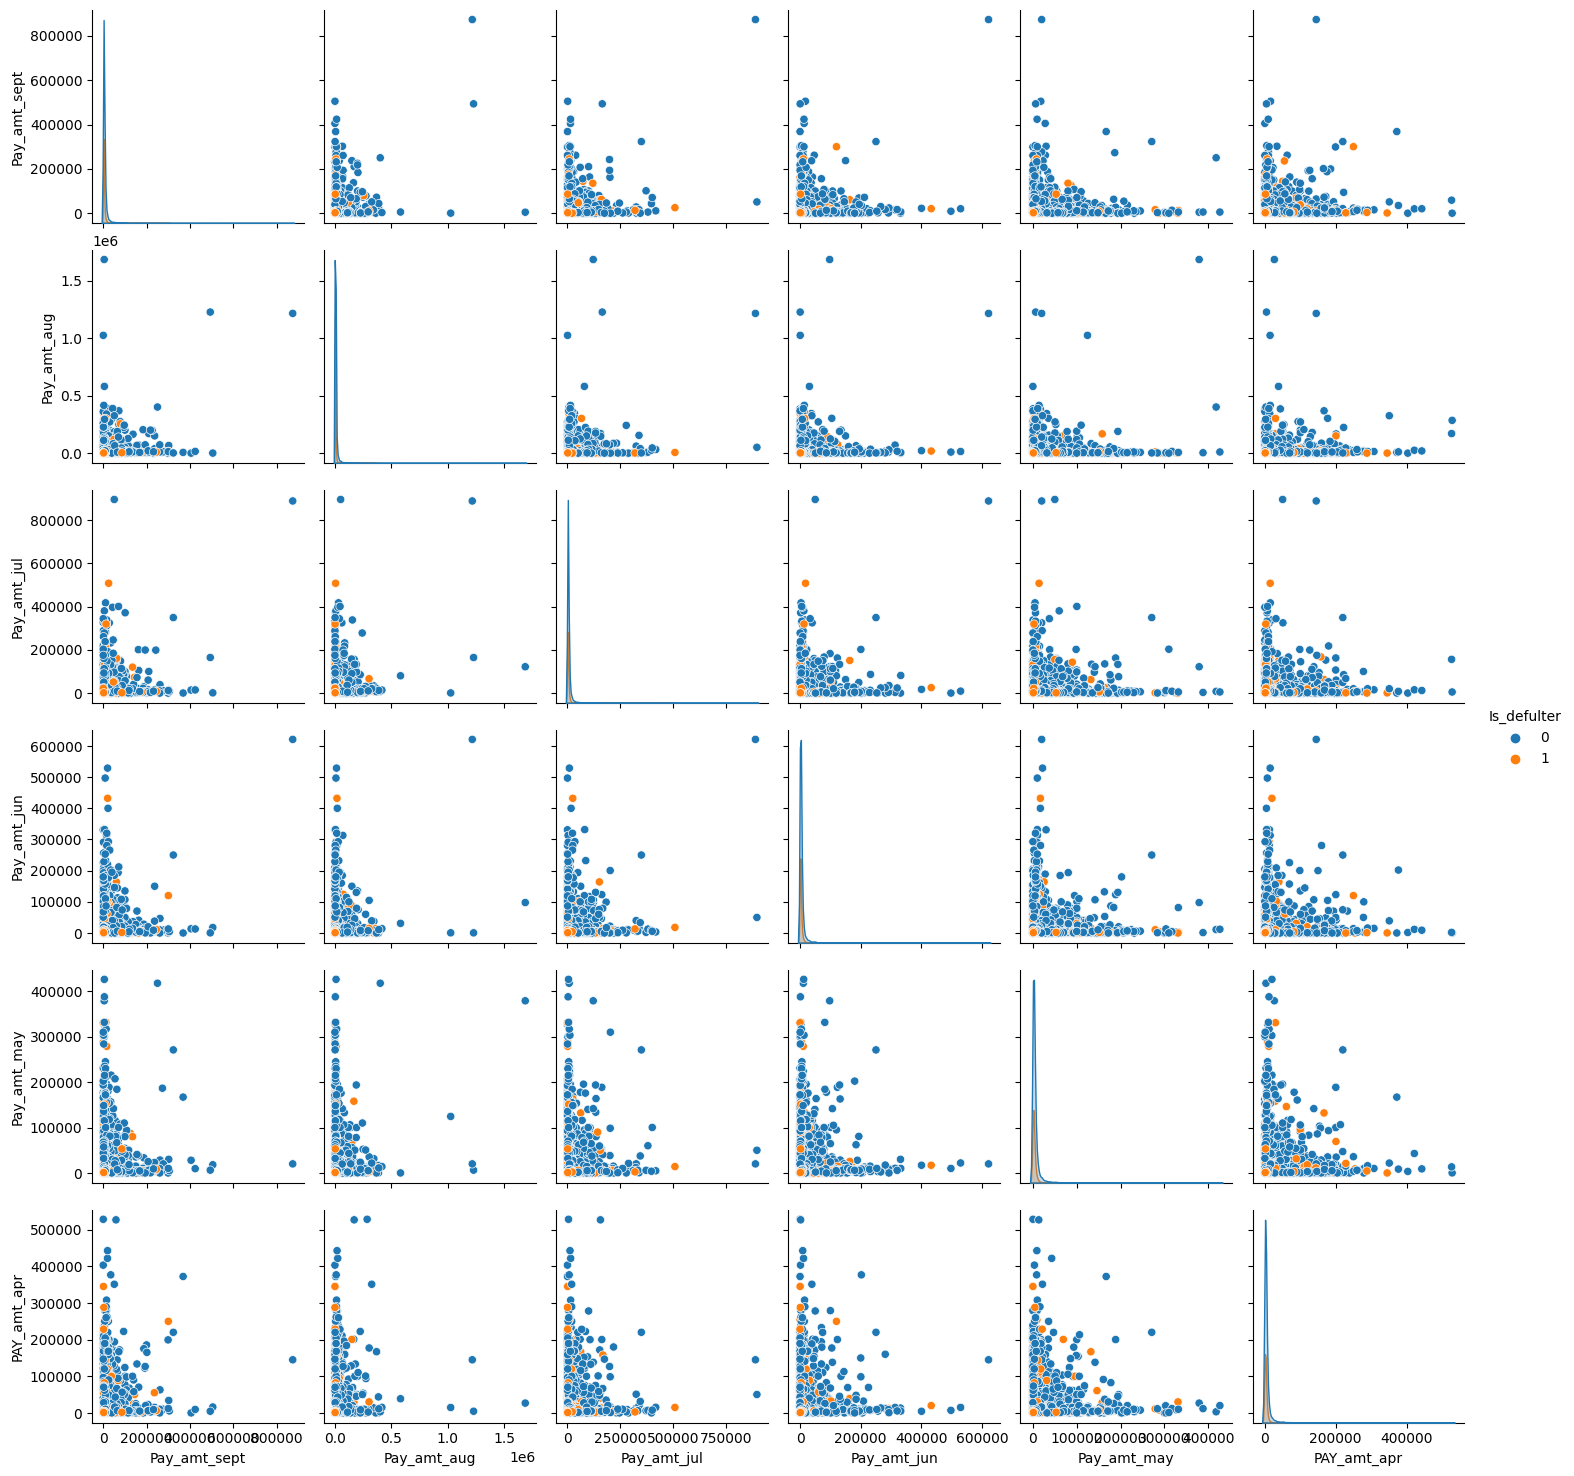

In [ ]:
sns.pairplot(data = pay_amnt_df, hue ='Is_defulter' )

##### 1. Why did you pick the specific chart?

scatter plot To visualize default rate for different pay amount groups and find any pattern.

##### 2. What is/are the insight(s) found from the chart?

As is evident, clients in the orange are defaulter or blue spots are non defaulters and are now being paid for a period of six months.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

In [ ]:
# Check correlation between Bill amount
Bill_amount = Credit_cf[['Bill_amt_sept',	'Bill_amt_aug',	'Bill_amt_jun',	'Bill_amt_may',	'Bill_amt_apr']]

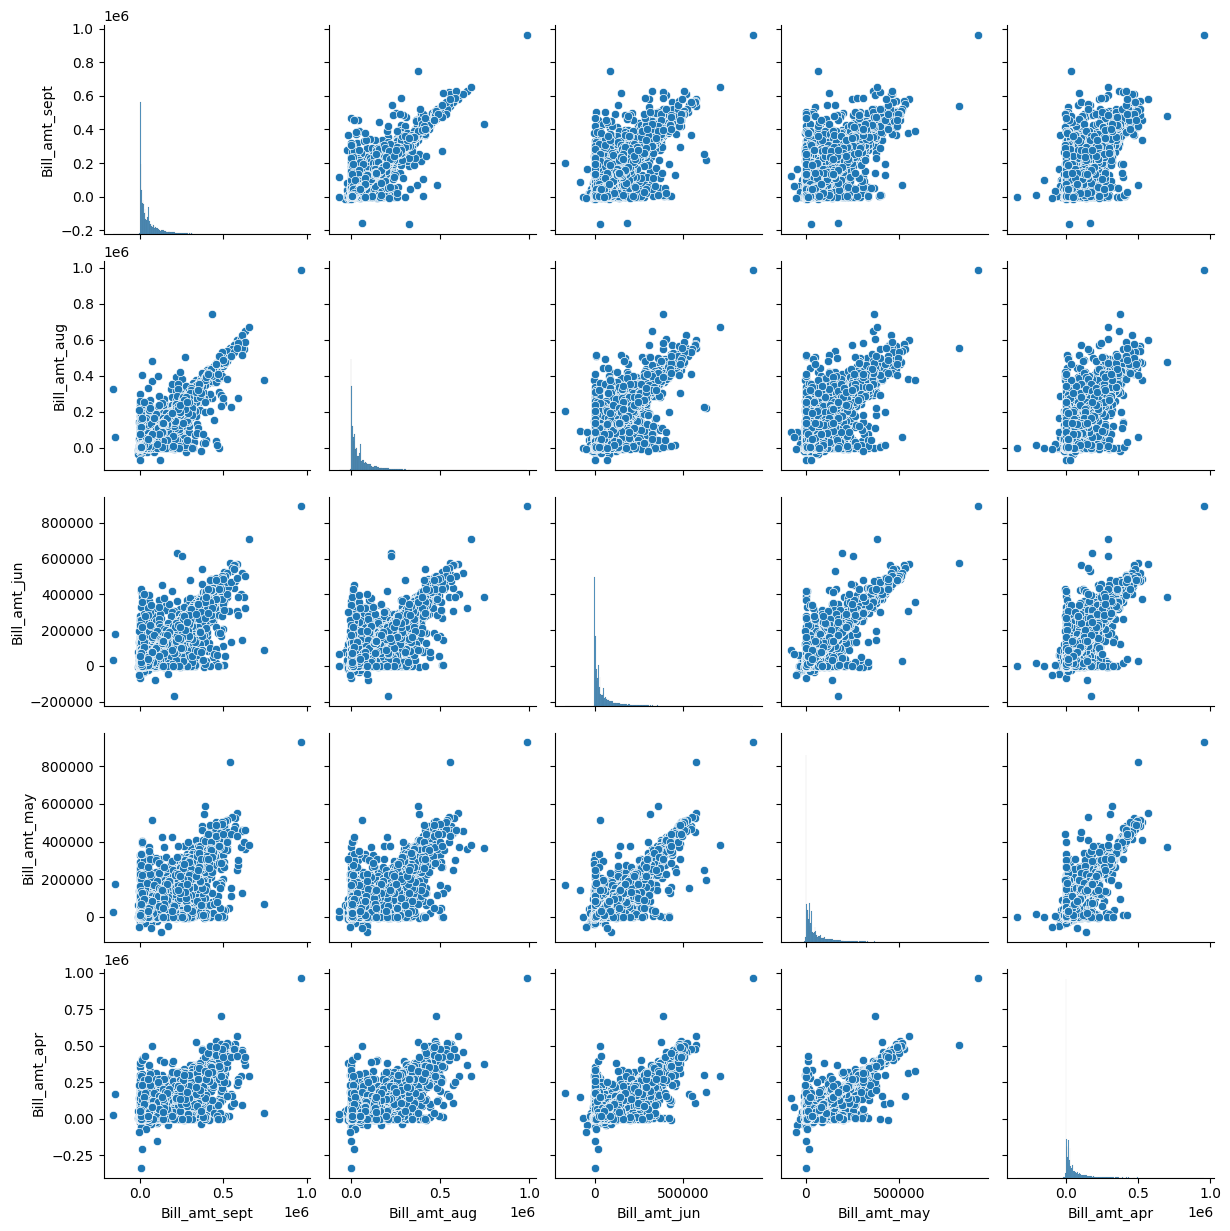

In [ ]:
sns.pairplot(data = Bill_amount)

##### 1. Why did you pick the specific chart?

pair plot show Bill amt of every month

##### 2. What is/are the insight(s) found from the chart?

Negative bill statements are associated with a reduced likelihood of default than positive ones, as would be predicted. What is notable is that those who didn't have a bill in the preceding months had a somewhat higher likelihood of defaulting.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

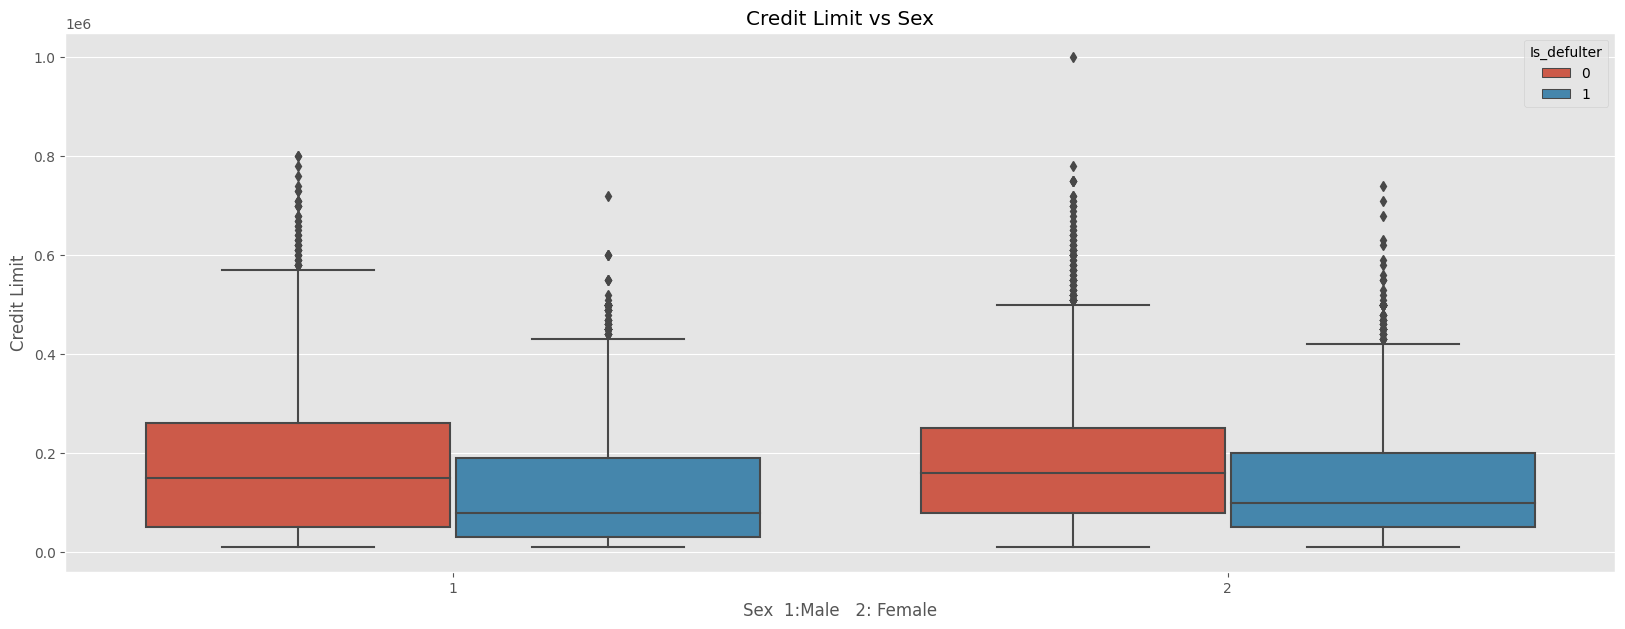

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
plt.title("Credit Limit vs Sex")
sns.boxplot(x='SEX',y='LIMIT_BAL',hue='Is_defulter',data=Credit_cf)
plt.ylabel("Credit Limit")
plt.xlabel('Sex  1:Male   2: Female')
plt.show()

##### 1. Why did you pick the specific chart?

box plot help me to check the mean vaule so i use the box plot.


##### 2. What is/are the insight(s) found from the chart?

Females Credit limit higher level than Men and default value same both of the categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

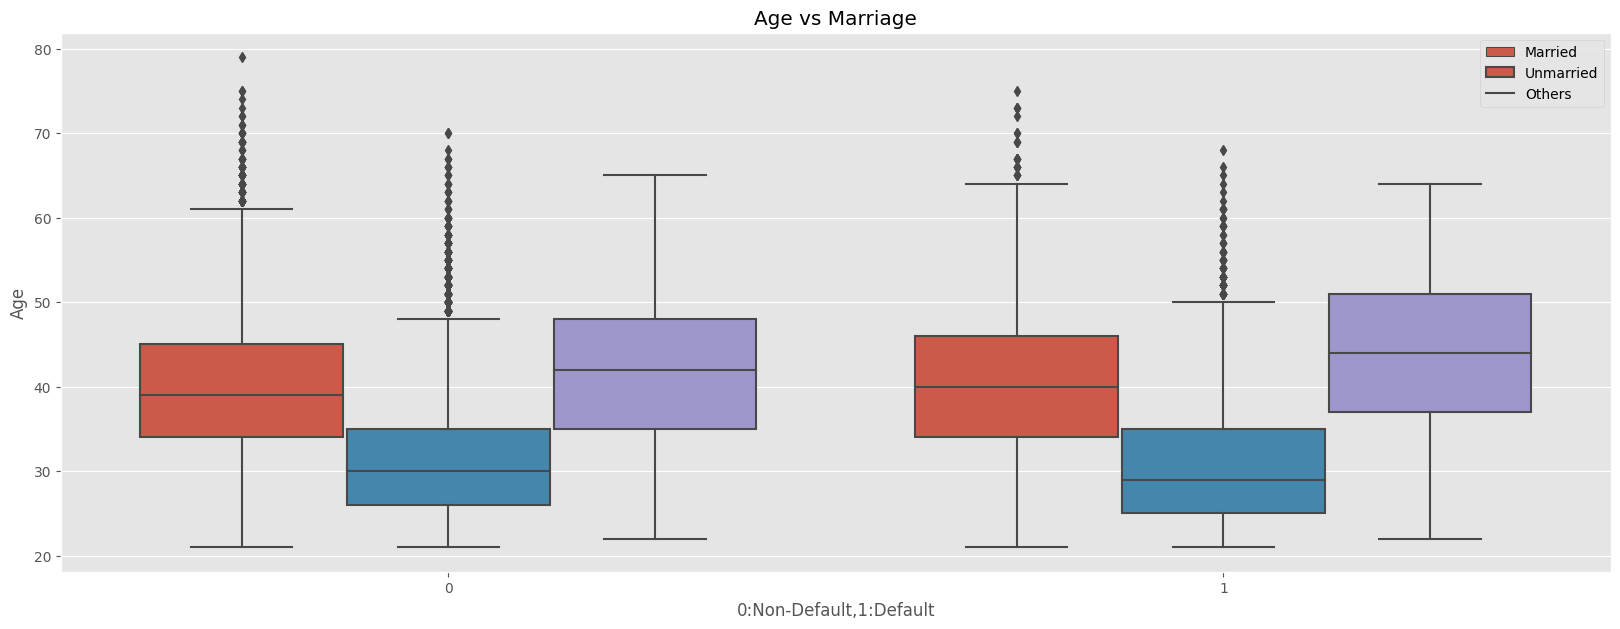

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(20,7))
plt.title("Age vs Marriage")
sns.boxplot(x='Is_defulter',hue='MARRIAGE', y='AGE',data=Credit_cf)
plt.ylabel("Age")
plt.xlabel('0:Non-Default,1:Default')
plt.legend(['Married','Unmarried','Others'])
plt.show()

##### 1. Why did you pick the specific chart?

box plot help me to check the mean vaule so i use the box plot.

#### Chart - 12 Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

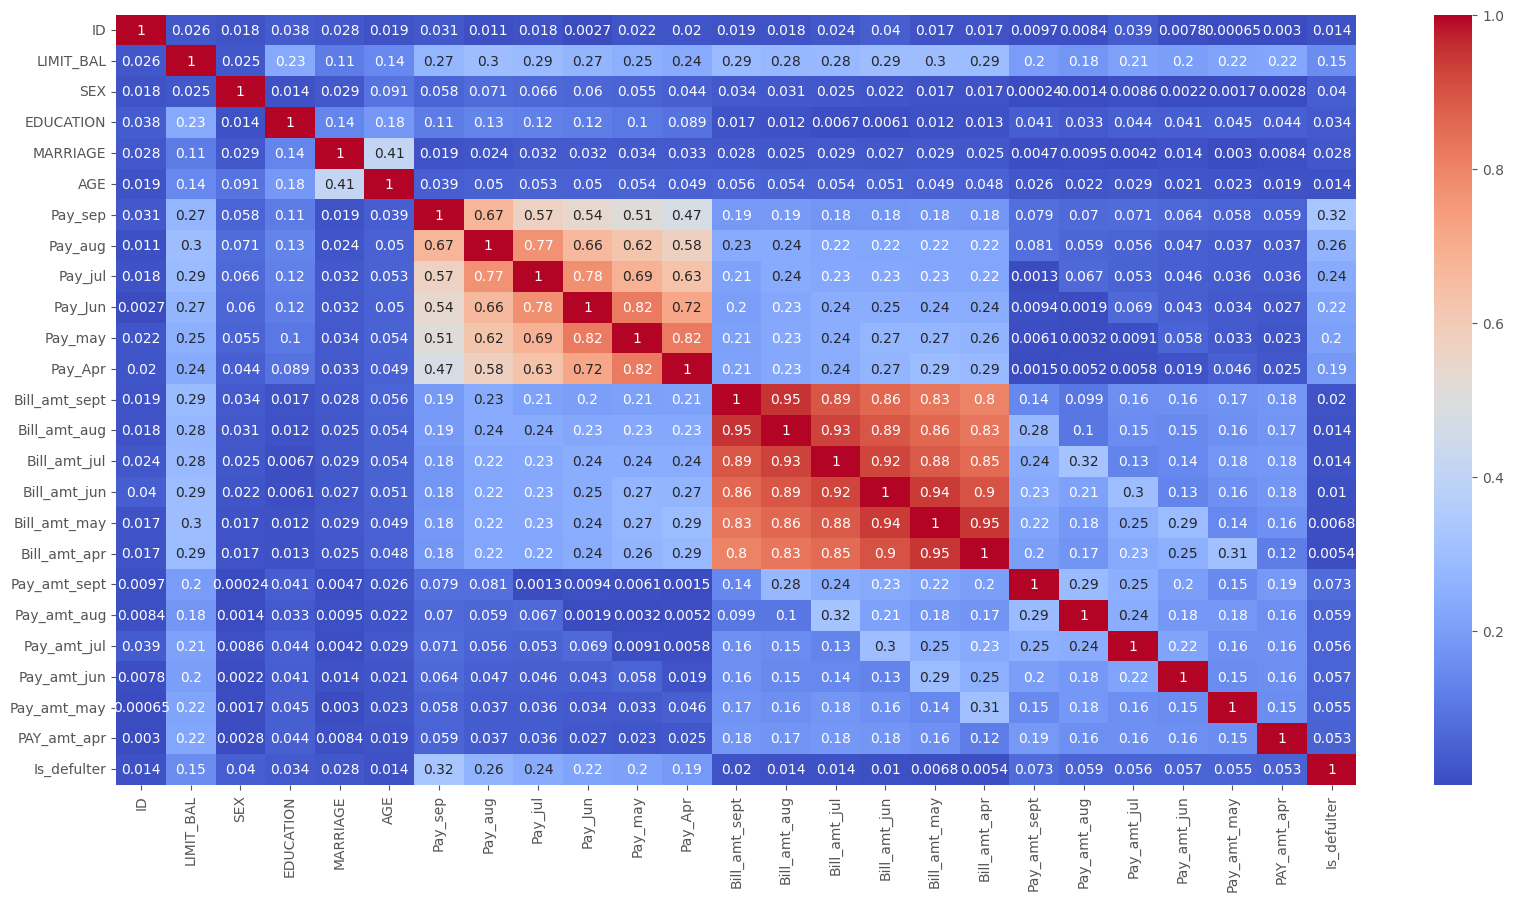

In [ ]:
plt.figure(figsize=(20,10))
correlation = Credit_cf.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

To check the correlation between each features in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The BILL_AMT columns have a strong correlation, which is understandable given that everyone has similar spending habits. Similarly, there is a correlation between PAY_AMT.

#### Chart - 13  Pair Plot

In [ ]:
# Pair Plot visualization code

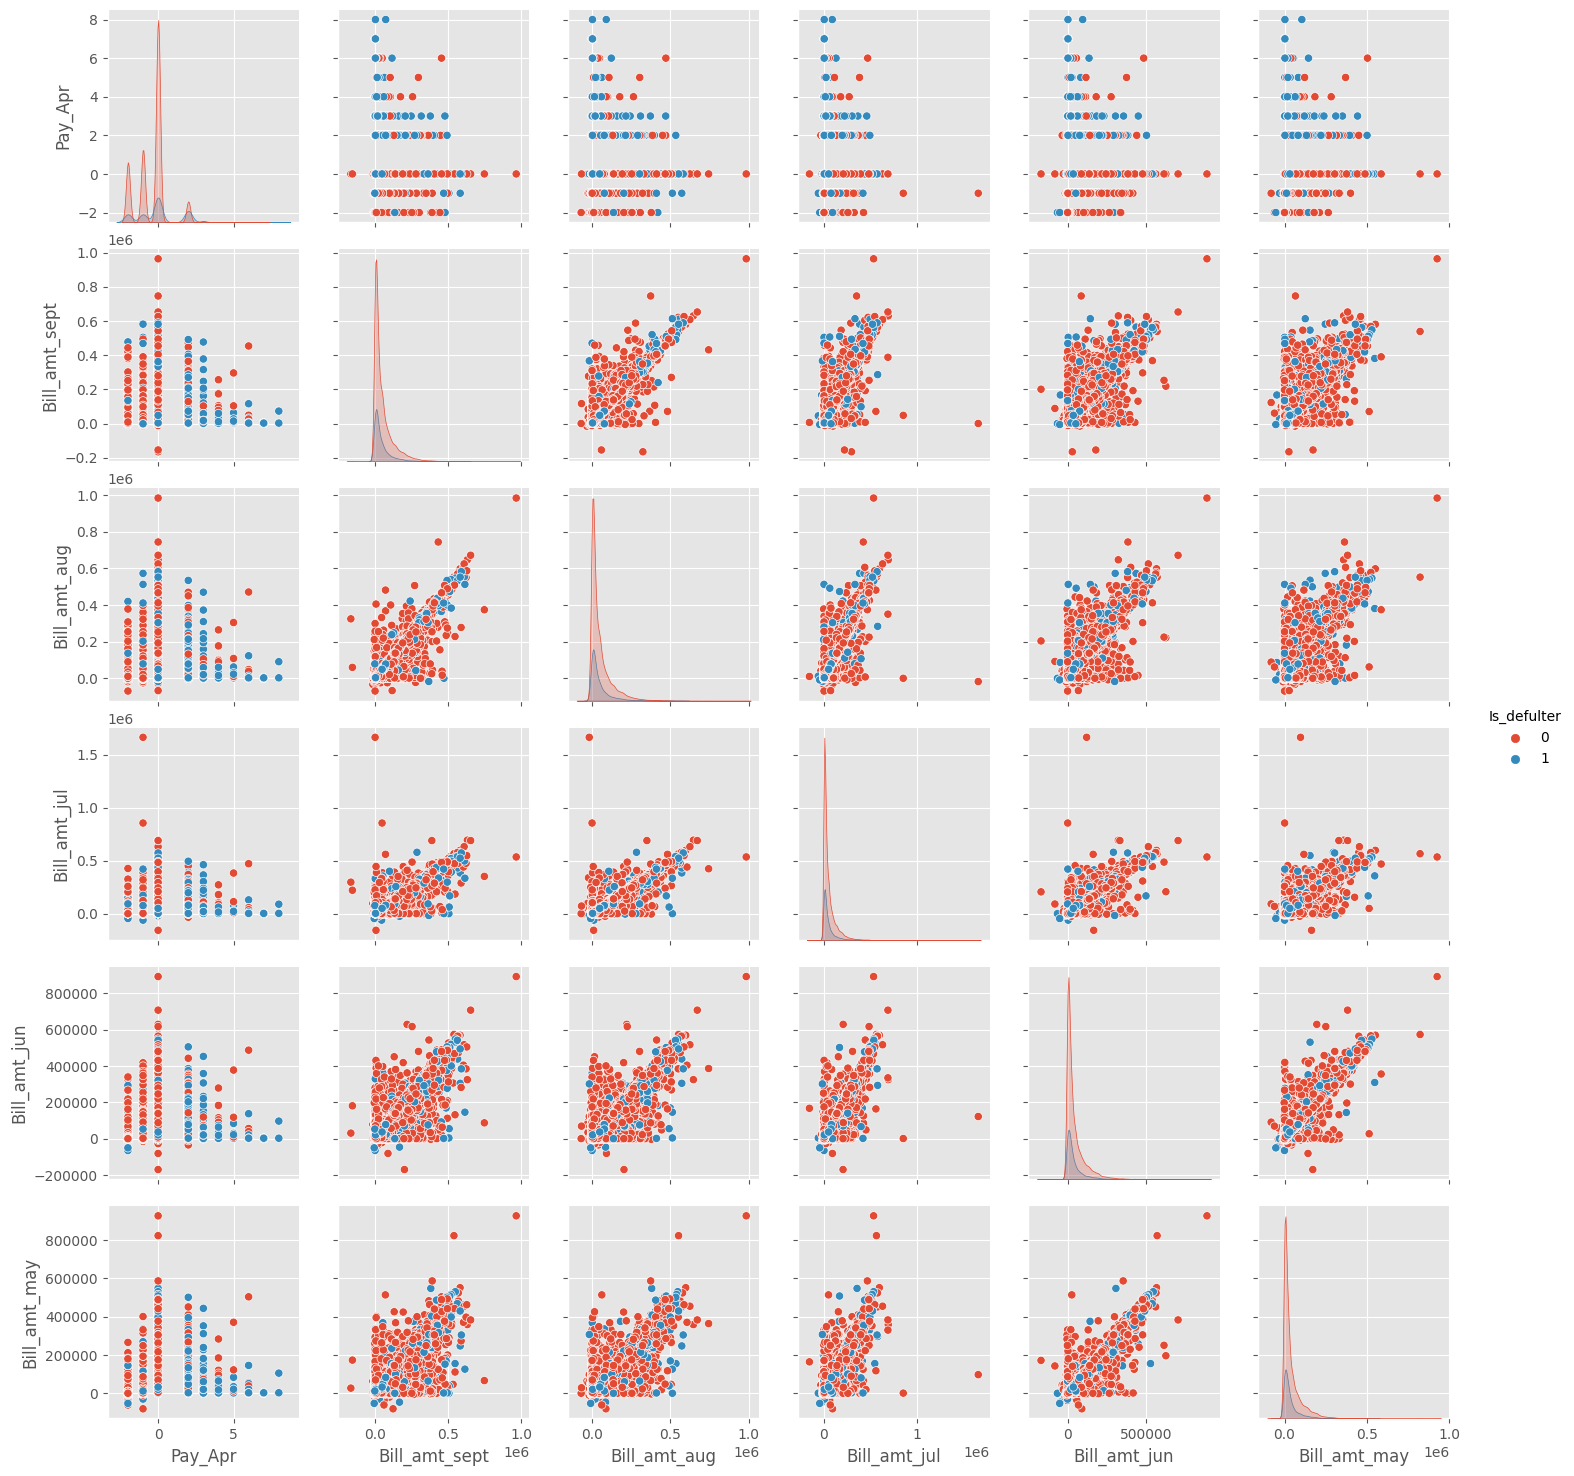

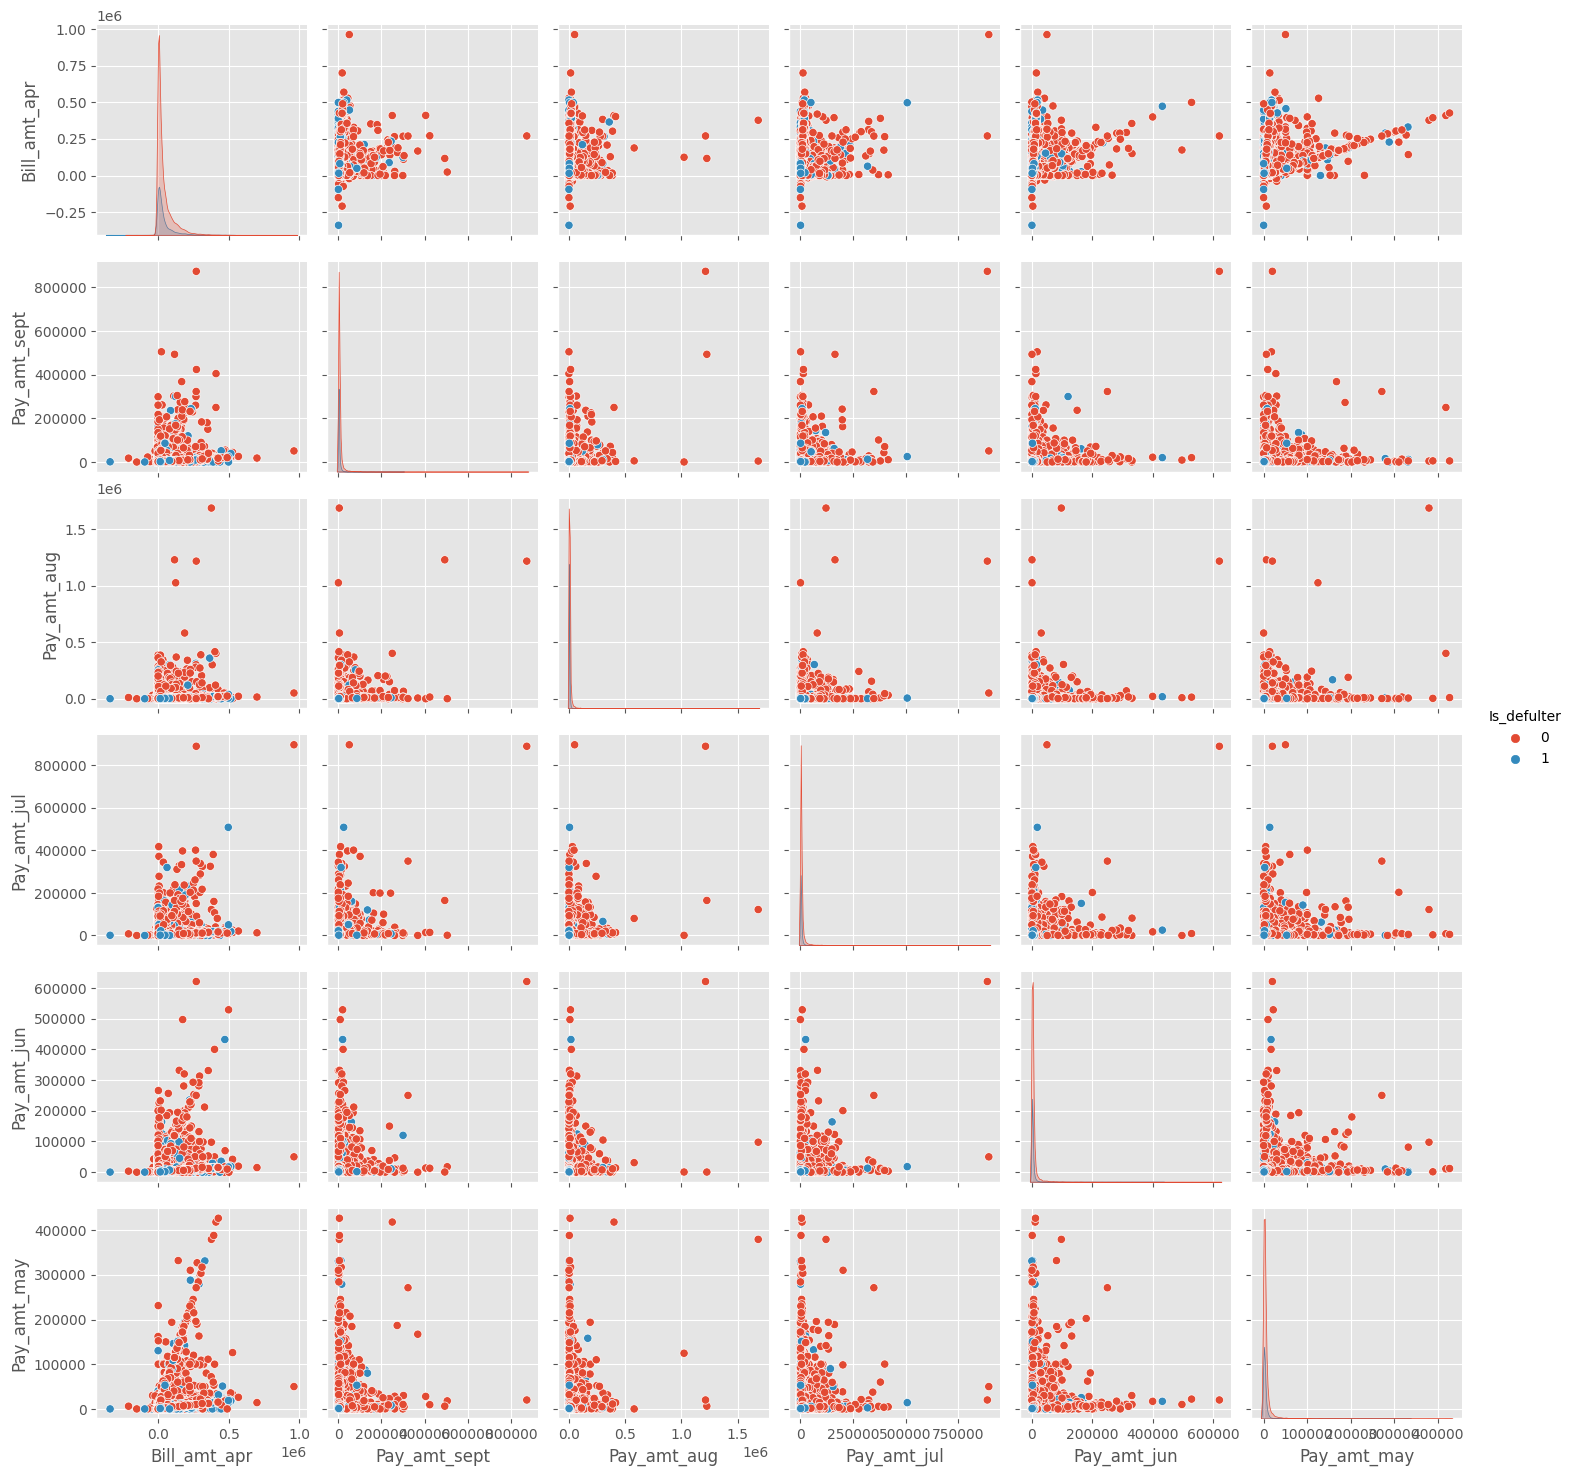

In [ ]:
sns.pairplot(Credit_cf, vars=Credit_cf.columns[11:17], kind='scatter',hue= 'Is_defulter')
sns.pairplot(Credit_cf, vars=Credit_cf.columns[17:23],hue = 'Is_defulter')

##### 1. Why did you pick the specific chart?

Using pairplot for check tha all variable Outliers.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Compared to men, women are less likely to fall behind on their payments.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: Maritial Status did not have any affect on default payment.

Alternate hypothesis: Maritial Status have affected default payment

#### 2. Perform an appropriate statistical test.

In [ ]:
# Create two groups based on sex
male_defaults = Credit_cf[( Credit_cf['SEX'] == 1) & ( Credit_cf['Is_defulter'] == 1)]
female_defaults =  Credit_cf[( Credit_cf['SEX'] == 2) & ( Credit_cf['Is_defulter'] == 1)]

# Calculate the proportions of defaulters in each group
male_proportion = len(male_defaults) / len(Credit_cf[Credit_cf['SEX'] == 1])
female_proportion = len(female_defaults) / len(Credit_cf[ Credit_cf['SEX'] == 2])

# Perform the test for the difference in proportions
z_score, p_value = proportions_ztest([len(female_defaults), len(male_defaults)],
                                           [len( Credit_cf[ Credit_cf['SEX'] == 2]), len( Credit_cf[ Credit_cf['SEX'] == 1])],
                                           alternative='smaller')

# Print the results
print("Male default rate:", round(male_proportion, 4))
print("Female default rate:", round(female_proportion, 4))
print("Z-score:", z_score)
print("P-value:", p_value)
print()
if p_value < 0.05:
  print(f"Since p-value ({p_value}) is less than 0.05, we reject null hypothesis.\nHence, The proportion of defaulters is lower for females than for males.")
else:
  print(f"Since p-value ({p_value}) is greater than 0.05, we fail to reject null hypothesis.\nHence, The proportion of defaulters is the same for males and females.")


Male default rate: 0.2417
Female default rate: 0.2078
Z-score: -6.921375088562895
P-value: 2.236402167907072e-12

Since p-value (2.236402167907072e-12) is less than 0.05, we reject null hypothesis.
Hence, The proportion of defaulters is lower for females than for males.


We have obtained p-value to be more that 5%, hence we accept our null hypothesis.

##### Which statistical test have you done to obtain P-Value?

The null hypothesis was rejected, and the proportion of defaulters is smaller for women than for men, according to the one-tailed two-sample z-test I used as the statistical test to get the P-Value.

##### Why did you choose the specific statistical test?

The two-sample z-test for proportions is used to detect whether there is a significant difference between two groups (in this example, males and females) in the proportion of a particular outcome (in this case, default payment). The one-tailed nature of the test implies that the direction of the difference—whether females have a smaller proportion of defaulters than males—rather than the size of the difference is all that is important.

### Hypothetical Statement - 2

Defaulters' average credit limits are lower than non-defaulters' average credit limits.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The average credit limit for defaulters is equal to the average credit limit for non-defaulters.

Alternative hypothesis: The average credit limit for defaulters is lower than the average credit limit for non-defaulters.

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Split the data into defaulters and non-defaulters
defaulters = Credit_cf[Credit_cf['Is_defulter'] == 1]
non_defaulters = Credit_cf[Credit_cf['Is_defulter'] == 0]

# Calculating the mean credit limit for defaulters and non-defaulters
mean_credit_limit_defaulters = defaulters['LIMIT_BAL'].mean()
mean_credit_limit_non_defaulters = non_defaulters['LIMIT_BAL'].mean()

# Calculating the standard deviation of credit limit for defaulters and non-defaulters
std_credit_limit_defaulters = defaulters['LIMIT_BAL'].std()
std_credit_limit_non_defaulters = non_defaulters['LIMIT_BAL'].std()

# Calculate the sample sizes for defaulters and non-defaulters
n_defaulters = len(defaulters)
n_non_defaulters = len(non_defaulters)

# Calculate the standard error of the mean difference
se_mean_difference = ((std_credit_limit_defaulters ** 2 / n_defaulters) + (std_credit_limit_non_defaulters ** 2 / n_non_defaulters)) ** 0.5

# Calculate the t-statistic and p-value using the two-sample t-test
t_stat, p_value = scipy.stats.ttest_ind(defaulters['LIMIT_BAL'], non_defaulters['LIMIT_BAL'], equal_var=False)

# Print the results
print('Mean credit limit for defaulters:', mean_credit_limit_defaulters)
print('Mean credit limit for non-defaulters:', mean_credit_limit_non_defaulters)
print('t-statistic:', t_stat)
print('p-value:', p_value)
print()
if p_value < 0.05:
  print(f"Since p-value ({p_value}) is less than 0.05, we reject null hypothesis.\nHence, The average credit limit for defaulters is lower than the average credit limit for non-defaulters.")
else:
  print(f"Since p-value ({p_value}) is greater than 0.05, we fail to reject null hypothesis.\nHence, The average credit limit for defaulters is equal to the average credit limit for non-defaulters.")


Mean credit limit for defaulters: 130109.65641952984
Mean credit limit for non-defaulters: 178099.72607430234
t-statistic: -28.951587933509845
p-value: 3.364100245511469e-178

Since p-value (3.364100245511469e-178) is less than 0.05, we reject null hypothesis.
Hence, The average credit limit for defaulters is lower than the average credit limit for non-defaulters.


In [ ]:
# Perform Statistical Test to obtain P-Value

P-value is very High. Hence, we accept our null hypthesis.

##### Which statistical test have you done to obtain P-Value?

The null hypothesis was rejected, and the average credit limit for defaulters is lower than the average credit limit for non-defaulters, according to the results of my two-sample t-test statistical analysis.

##### Why did you choose the specific statistical test?

The two-sample t-test is a statistical test for comparing means and is useful when the requirements of normality are met, yet we may still apply the t-test if the sample sizes are big (6636 and 23364 in this example).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

No Missing value in our data set.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
Numerical_columns = ['ID', 'LIMIT_BAL', 'AGE', 'Bill_amt_sept',	'Bill_amt_aug','Bill_amt_jul'	,'Bill_amt_jun',	'Bill_amt_may',	'Bill_amt_apr','Pay_amt_sept','Pay_amt_aug',	'Pay_amt_jul',	'Pay_amt_jun', 'Pay_amt_may',	'PAY_amt_apr']

In [ ]:
def draw_histograms(Credit_cf, columns, bins=50):
    fig=plt.figure(figsize=(18,25))
    for i, col in enumerate(Numerical_columns):
      plt.subplot(10, 4, i+1)
      sns.histplot(Credit_cf[col], kde=True, bins=bins)
      plt.title(col)
    fig.tight_layout()

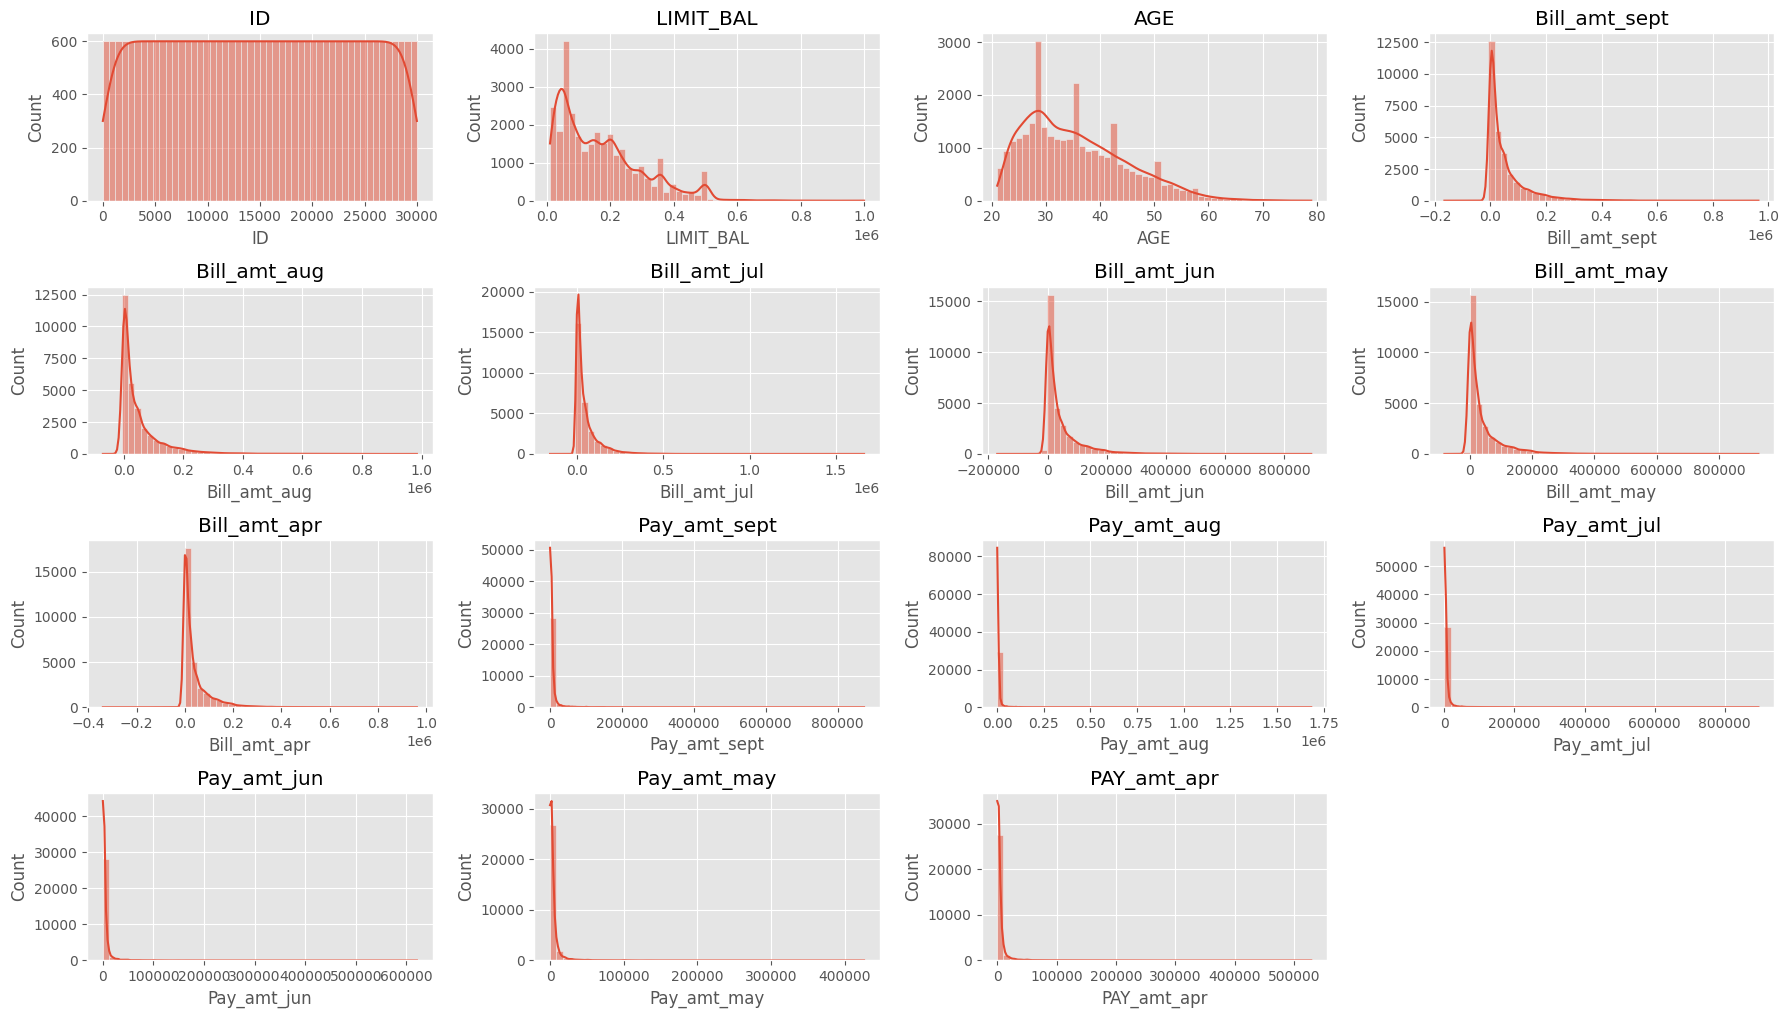

In [ ]:
draw_histograms(Credit_cf , Numerical_columns)

We can see that most of the numerical columns are right skewed.

Also late_payment_count have 6 values with 0 being majority and we can't treat high values (5 or 6) as outliers as these high values increases chances of defaulting.

In [ ]:
#Looking deep into cases with high values for BILL_AMT1 to study if they are genuine observations of data entry errors
Credit_cf[Credit_cf['Bill_amt_sept'] > 400000][['LIMIT_BAL', 'Pay_sep', 'Pay_aug', 'Pay_jul', 'Bill_amt_sept','Bill_amt_aug', 'Bill_amt_jul', 'Pay_amt_sept', 'Pay_amt_aug', 'Pay_amt_jul', 'Is_defulter']].head(20)

LIMIT_BAL  Pay_sep  Pay_aug  Pay_jul  Bill_amt_sept  Bill_amt_aug  \
59       400000        0        0        0         400134        398857   
102      480000        0        0        0         422069        431342   
360      500000        4        3        2         507726        509229   
407      500000        1        2        0         507062        491956   
451      600000        2        2        0         467150        458862   
918      240000        0        0        0         471814        478380   
1184     460000        0        0        0         410033        385394   
1347     630000        0        0        0         440474        444370   
1358     390000        0        0        0         495559        248821   
1508     480000        0        0        0         482250        475931   
1678     390000        1        2        0         424244        395060   
1826     260000        0        0        0         425349        435873   
1862     500000        0        0        0         407331        403816   
1913     450000        0        0       -1         457627         38692   
1935     460000        0        0        0         449790        450047   
1992     580000        2        2        3         453985        470915   
2174     440000        0        0        0         485921        234046   
2192     500000        0        0        0         419487        389605   
2197    1000000        0        0        0         964511        983931   
2211     500000        0        0        0         416171        437749   

      Bill_amt_jul  Pay_amt_sept  Pay_amt_aug  Pay_amt_jul  Is_defulter  
59          404205         17000        15029        30000            0  
102         479432         16078        55693        17000            0  
360         499936         10000            0        14000            1  
407         430637           325        15296        12137            0  
451         469703             0        18000        16000            1  
918         395612         16044        15087        12000            0  
1184        325663         16088        13039        11127            0  
1347        455286         18000        20000        12000            0  
1358        216051         10218         8035         7035            0  
1508        429037         18093        15233        12597            0  
1678        258372           587         9500        30140            0  
1826        445129         14347        15000        12406            1  
1862        386053         15043        14000        14003            0  
1913          4549          1000         4549        16885            0  
1935        453770         17610        17500        13810            0  
1992        471175         25704         9464        25065            0  
2174        214092         20000         7822         8000            0  
2192        309466         13000        20000        15000            0  
2197        535020         50784        50723       896040            0  
2211        460317         30000        30000        20000            0


They looks like rows with very high values for BILL_AMTX also their LIMIT_BAL is very high. So they must be representing few super rich people and the data are genuine not an error. Hence they are not outliers.

Those who defaulted have significantly lower PAY_AMT compared to BILL_AMT which is expected.

In [ ]:
Credit_cf[Credit_cf['Bill_amt_sept'] > 300000][['LIMIT_BAL', 'Pay_sep', 'Pay_aug', 'Pay_jul', 'Bill_amt_sept','Bill_amt_aug', 'Bill_amt_jul', 'Pay_amt_sept', 'Pay_amt_aug', 'Pay_amt_jul', 'Is_defulter']].head(20)

LIMIT_BAL  Pay_sep  Pay_aug  Pay_jul  Bill_amt_sept  Bill_amt_aug  \
6        500000        0        0        0         367965        412023   
59       400000        0        0        0         400134        398857   
102      480000        0        0        0         422069        431342   
123      310000        2        0        0         304991        311243   
221      330000        0        0        0         335196        334954   
360      500000        4        3        2         507726        509229   
385      410000        0        0        0         338106        342904   
407      500000        1        2        0         507062        491956   
431      390000        0        0        0         304867        299998   
451      600000        2        2        0         467150        458862   
470      390000        0        0        0         355215        363325   
471      400000        0        0        0         366193        372700   
536      440000        0        0        0         330759        337794   
844      500000        0        0        0         315201        332071   
869      290000        0        0        0         310403        315048   
911      500000       -1        0        0         386405        387910   
918      240000        0        0        0         471814        478380   
1086     410000        0        0        0         354506        363666   
1181     390000        2        0        0         386301        392458   
1184     460000        0        0        0         410033        385394   

      Bill_amt_jul  Pay_amt_sept  Pay_amt_aug  Pay_amt_jul  Is_defulter  
6           445007         55000        40000        38000            0  
59          404205         17000        15029        30000            0  
102         479432         16078        55693        17000            0  
123         306314         13019        11128         8407            1  
221         335527         12388        12378        12116            0  
360         499936         10000            0        14000            1  
385         344464         15000        14000         9000            0  
407         430637           325        15296        12137            0  
431         300426         13007        10612        10041            1  
451         469703             0        18000        16000            1  
470         373181         13802        16525         8893            1  
471         375948         14020        13595         6243            0  
536         274075         13100        11000        10000            0  
844         375070         25000        50000        20000            0  
869         314085         12012        12012        11016            0  
911         293177         25016        20018        10000            0  
918         395612         16044        15087        12000            0  
1086        369776         14600        15500        14000            1  
1181        290201         17000        11000        11000            0  
1184        325663         16088        13039        11127            0

Similarly for very high PAY_AMT values we can see they have very high BILL_AMT in previous months and all payments are done duly, So they must be representing super rich people and data is genuine and not errors. Hence they are not outliers.

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
Credit_cf.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


In [ ]:
Credit_cf['EDUCATION']

0         university
1         university
2         university
3         university
4         university
            ...     
29995    high school
29996    high school
29997     university
29998    high school
29999     university
Name: EDUCATION, Length: 30000, dtype: object

In [ ]:
Credit_cf

ID  LIMIT_BAL     SEX    EDUCATION MARRIAGE  AGE  Pay_sep  Pay_aug  \
0          1      20000  FEMALE   university  married   24        2        2   
1          2     120000  FEMALE   university   single   26       -1        2   
2          3      90000  FEMALE   university   single   34        0        0   
3          4      50000  FEMALE   university  married   37        0        0   
4          5      50000    MALE   university  married   57       -1        0   
...      ...        ...     ...          ...      ...  ...      ...      ...   
29995  29996     220000    MALE  high school  married   39        0        0   
29996  29997     150000    MALE  high school   single   43       -1       -1   
29997  29998      30000    MALE   university   single   37        4        3   
29998  29999      80000    MALE  high school  married   41        1       -1   
29999  30000      50000    MALE   university  married   46        0        0   

       Pay_jul  Pay_Jun  ...  Bill_amt_jun  Bill_amt_may  Bill_amt_apr  \
0           -1       -1  ...             0             0             0   
1            0        0  ...          3272          3455          3261   
2            0        0  ...         14331         14948         15549   
3            0        0  ...         28314         28959         29547   
4           -1        0  ...         20940         19146         19131   
...        ...      ...  ...           ...           ...           ...   
29995        0        0  ...         88004         31237         15980   
29996       -1       -1  ...          8979          5190             0   
29997        2       -1  ...         20878         20582         19357   
29998        0        0  ...         52774         11855         48944   
29999        0        0  ...         36535         32428         15313   

       Pay_amt_sept  Pay_amt_aug  Pay_amt_jul  Pay_amt_jun  Pay_amt_may  \
0                 0          689            0            0            0   
1                 0         1000         1000         1000            0   
2              1518         1500         1000         1000         1000   
3              2000         2019         1200         1100         1069   
4              2000        36681        10000         9000          689   
...             ...          ...          ...          ...          ...   
29995          8500        20000         5003         3047         5000   
29996          1837         3526         8998          129            0   
29997             0            0        22000         4200         2000   
29998         85900         3409         1178         1926        52964   
29999          2078         1800         1430         1000         1000   

       PAY_amt_apr  Is_defulter  
0                0            1  
1             2000            1  
2             5000            0  
3             1000            0  
4              679            0  
...            ...          ...  
29995         1000            0  
29996            0            0  
29997         3100            1  
29998         1804            1  
29999         1000            1  

[30000 rows x 25 columns]

**One Hot encoding**

In [ ]:
Credit_cf = pd.get_dummies(Credit_cf,columns=['EDUCATION','MARRIAGE'])

In [ ]:
Credit_cf.head()

ID  LIMIT_BAL     SEX  AGE  Pay_sep  Pay_aug  Pay_jul  Pay_Jun  Pay_may  \
0   1      20000  FEMALE   24        2        2       -1       -1       -2   
1   2     120000  FEMALE   26       -1        2        0        0        0   
2   3      90000  FEMALE   34        0        0        0        0        0   
3   4      50000  FEMALE   37        0        0        0        0        0   
4   5      50000    MALE   57       -1        0       -1        0        0   

   Pay_Apr  ...  Pay_amt_may  PAY_amt_apr  Is_defulter  \
0       -2  ...            0            0            1   
1        2  ...            0         2000            1   
2        0  ...         1000         5000            0   
3        0  ...         1069         1000            0   
4        0  ...          689          679            0   

   EDUCATION_graduate school  EDUCATION_high school  EDUCATION_others  \
0                          0                      0                 0   
1                          0                      0                 0   
2                          0                      0                 0   
3                          0                      0                 0   
4                          0                      0                 0   

   EDUCATION_university  MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  
0                     1                 1                0                0  
1                     1                 0                0                1  
2                     1                 0                0                1  
3                     1                 1                0                0  
4                     1                 1                0                0  

[5 rows x 30 columns]

In [ ]:
Credit_cf.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [ ]:
Credit_cf = pd.get_dummies(Credit_cf, columns = ['Pay_sep',	'Pay_aug',	'Pay_jul','Pay_Jun' , 'Pay_may','Pay_Apr'], drop_first = True )

In [ ]:
Credit_cf.head()

ID  LIMIT_BAL     SEX  AGE  Bill_amt_sept  Bill_amt_aug  Bill_amt_jul  \
0   1      20000  FEMALE   24           3913          3102           689   
1   2     120000  FEMALE   26           2682          1725          2682   
2   3      90000  FEMALE   34          29239         14027         13559   
3   4      50000  FEMALE   37          46990         48233         49291   
4   5      50000    MALE   57           8617          5670         35835   

   Bill_amt_jun  Bill_amt_may  Bill_amt_apr  ...  Pay_may_8  Pay_Apr_-1  \
0             0             0             0  ...          0           0   
1          3272          3455          3261  ...          0           0   
2         14331         14948         15549  ...          0           0   
3         28314         28959         29547  ...          0           0   
4         20940         19146         19131  ...          0           0   

   Pay_Apr_0  Pay_Apr_2  Pay_Apr_3  Pay_Apr_4  Pay_Apr_5  Pay_Apr_6  \
0          0          0          0          0          0          0   
1          0          1          0          0          0          0   
2          1          0          0          0          0          0   
3          1          0          0          0          0          0   
4          1          0          0          0          0          0   

   Pay_Apr_7  Pay_Apr_8  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 80 columns]

In [ ]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
Credit_cf = Credit_cf.replace(encoders_nums)

In [ ]:
Credit_cf.head()

ID  LIMIT_BAL  SEX  AGE  Bill_amt_sept  Bill_amt_aug  Bill_amt_jul  \
0   1      20000    0   24           3913          3102           689   
1   2     120000    0   26           2682          1725          2682   
2   3      90000    0   34          29239         14027         13559   
3   4      50000    0   37          46990         48233         49291   
4   5      50000    1   57           8617          5670         35835   

   Bill_amt_jun  Bill_amt_may  Bill_amt_apr  ...  Pay_may_8  Pay_Apr_-1  \
0             0             0             0  ...          0           0   
1          3272          3455          3261  ...          0           0   
2         14331         14948         15549  ...          0           0   
3         28314         28959         29547  ...          0           0   
4         20940         19146         19131  ...          0           0   

   Pay_Apr_0  Pay_Apr_2  Pay_Apr_3  Pay_Apr_4  Pay_Apr_5  Pay_Apr_6  \
0          0          0          0          0          0          0   
1          0          1          0          0          0          0   
2          1          0          0          0          0          0   
3          1          0          0          0          0          0   
4          1          0          0          0          0          0   

   Pay_Apr_7  Pay_Apr_8  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 80 columns]

In [ ]:
Credit_cf.shape

(30000, 80)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have use one hot cording sex , Education ,marriage and pay because the represents categorical values with no order also number of categories is not too high.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

<function matplotlib.pyplot.show(close=None, block=None)>

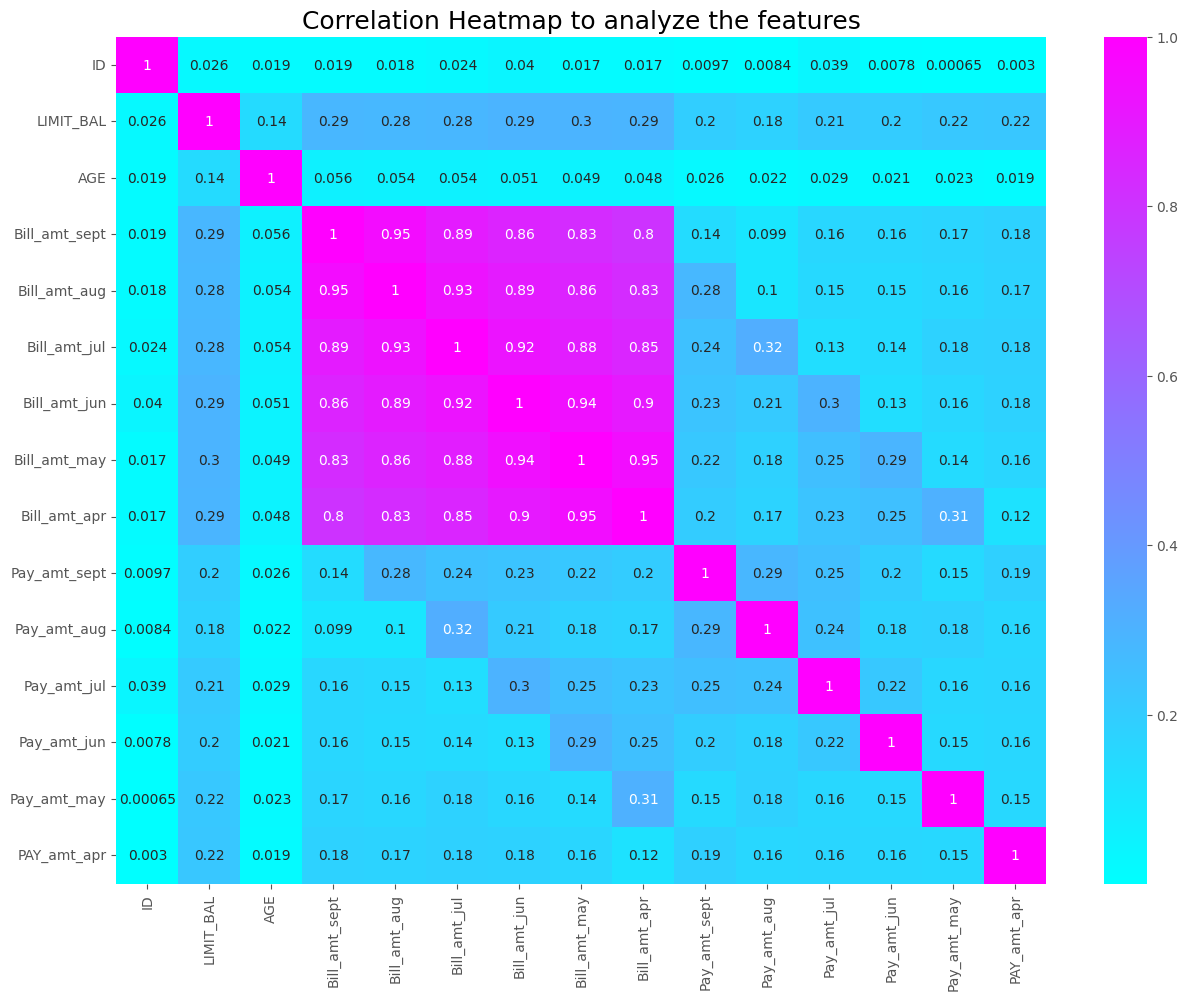

In [ ]:
plt.figure(figsize = (15,11))
sns.heatmap(abs(Credit_cf[Numerical_columns].corr()), annot = True, cmap = 'cool').set_title('Correlation Heatmap to analyze the features', fontsize = 18)
plt.show

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variable"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values ,i) for i in range (X.shape[1])]

  return(vif)

In [ ]:
calc_vif(Credit_cf[Numerical_columns])

variable        VIF
0              ID   3.466825
1       LIMIT_BAL   3.229851
2             AGE   4.795868
3   Bill_amt_sept  20.646753
4    Bill_amt_aug  38.068150
5    Bill_amt_jul  31.712812
6    Bill_amt_jun  29.544325
7    Bill_amt_may  35.922737
8    Bill_amt_apr  21.287569
9    Pay_amt_sept   1.889069
10    Pay_amt_aug   2.369971
11    Pay_amt_jul   1.887769
12    Pay_amt_jun   1.786831
13    Pay_amt_may   1.844811
14    PAY_amt_apr   1.269660

In [ ]:
calc_vif(Credit_cf[[i for i in(Credit_cf[Numerical_columns]).describe().columns if i not in ['Bill_amt_sept',	'Bill_amt_aug',	'Bill_amt_jun',	'Bill_amt_may',	'Bill_amt_apr']]])

variable       VIF
0            ID  3.446999
1     LIMIT_BAL  3.193208
2           AGE  4.772320
3  Bill_amt_jul  1.777389
4  Pay_amt_sept  1.334929
5   Pay_amt_aug  1.308976
6   Pay_amt_jul  1.266789
7   Pay_amt_jun  1.224861
8   Pay_amt_may  1.213108
9   PAY_amt_apr  1.205090

In [ ]:
Cr = Credit_cf.drop('ID',axis = 1)

In [ ]:
Cr

LIMIT_BAL  SEX  AGE  Bill_amt_sept  Bill_amt_aug  Bill_amt_jul  \
0          20000    0   24           3913          3102           689   
1         120000    0   26           2682          1725          2682   
2          90000    0   34          29239         14027         13559   
3          50000    0   37          46990         48233         49291   
4          50000    1   57           8617          5670         35835   
...          ...  ...  ...            ...           ...           ...   
29995     220000    1   39         188948        192815        208365   
29996     150000    1   43           1683          1828          3502   
29997      30000    1   37           3565          3356          2758   
29998      80000    1   41          -1645         78379         76304   
29999      50000    1   46          47929         48905         49764   

       Bill_amt_jun  Bill_amt_may  Bill_amt_apr  Pay_amt_sept  ...  Pay_may_8  \
0                 0             0             0             0  ...          0   
1              3272          3455          3261             0  ...          0   
2             14331         14948         15549          1518  ...          0   
3             28314         28959         29547          2000  ...          0   
4             20940         19146         19131          2000  ...          0   
...             ...           ...           ...           ...  ...        ...   
29995         88004         31237         15980          8500  ...          0   
29996          8979          5190             0          1837  ...          0   
29997         20878         20582         19357             0  ...          0   
29998         52774         11855         48944         85900  ...          0   
29999         36535         32428         15313          2078  ...          0   

       Pay_Apr_-1  Pay_Apr_0  Pay_Apr_2  Pay_Apr_3  Pay_Apr_4  Pay_Apr_5  \
0               0          0          0          0          0          0   
1               0          0          1          0          0          0   
2               0          1          0          0          0          0   
3               0          1          0          0          0          0   
4               0          1          0          0          0          0   
...           ...        ...        ...        ...        ...        ...   
29995           0          1          0          0          0          0   
29996           0          1          0          0          0          0   
29997           0          1          0          0          0          0   
29998           1          0          0          0          0          0   
29999           0          1          0          0          0          0   

       Pay_Apr_6  Pay_Apr_7  Pay_Apr_8  
0              0          0          0  
1              0          0          0  
2              0          0          0  
3              0          0          0  
4              0          0          0  
...          ...        ...        ...  
29995          0          0          0  
29996          0          0          0  
29997          0          0          0  
29998          0          0          0  
29999          0          0          0  

[30000 rows x 79 columns]

##### What all feature selection methods have you used  and why?

Since there are only 9 categorical features, I have used only One Hot Encoding. One Hot Encoding creates new columns as much as the number of unique values. One Hot Encoding makes our training data more useful and expressive, and it can be rescaled easily.

### 5. Data Splitting

In [ ]:
# Transform Your data

In [ ]:
X = Cr.drop('Is_defulter', axis=1)
y = Cr['Is_defulter']

In [ ]:
#split the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(24000, 78)
(6000, 78)


### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

We can observe that the data is unbalanced from the above.

* Only 22% of the data in our 24,000 training sample are defaults.

* Only 21.6% of the 6000 test dataset's data are defaults.

Therefore, we must balance the datasets we use for training and testing.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Upsamping minority class using SMOTE method
print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()
# Resampling the minority class
X_train,y_train= SMOTE.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18661, 1: 5339})
After oversampling:  Counter({0: 18661, 1: 18661})


In [ ]:
# Handling Imbalanced Dataset (If needed)
print("Before oversampling: ",Counter(y_test))

X_test,y_test= SMOTE.fit_resample(X_test,y_test)
print("After oversampling: ",Counter(y_test))

Before oversampling:  Counter({0: 4703, 1: 1297})
After oversampling:  Counter({0: 4703, 1: 4703})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Because undersampling might result in data loss, I have not employed it. This would result in the loss of around 13,000 rows from our training dataset.

To balance our data, I have instead employed Synthetic Minority Oversampling Technique (SMOTE). This method produces fake data for the minority class. SMOTE operates by selecting a point at random from the minority class and calculating its k-nearest neighbors. Between the selected point and its neighbors, the synthetic points are inserted.

### 7. Data Scaling

In [ ]:
# Scaling your data

In [ ]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train= std.fit_transform(X_train)
X_test = std.fit_transform(X_test)


##### Which method have you used to scale you data and why?

The process used to normalize the variety of characteristics in data is known as feature scaling, often referred to as data normalization. Since data values might fluctuate considerably, preparing the data before utilizing machine learning algorithms becomes essential.

Standardization and Normalization

Normalization is the process of transforming your observations into something that can be compared to a normal distribution. Your data are transformed by standardization, also known as z-score normalization, to produce a distribution with a mean of 0 and a standard deviation of 1.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
# ML Model - 1 Implementation
log = LogisticRegression(random_state = 42)

# Fit the Algorithm
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Predict on the model
log_train  = log.predict(X_train)
log_test  = log.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
train_accuracy = accuracy_score(log_train,y_train)
test_accuracy = accuracy_score(log_test,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8254916671132309
The accuracy on test data is  0.8251116308739103


[[16195  2466]
 [ 4047 14614]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

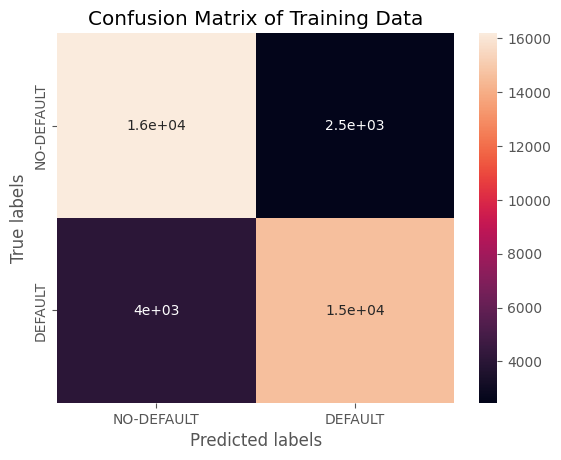

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_train, log_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[4079  624]
 [1021 3682]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

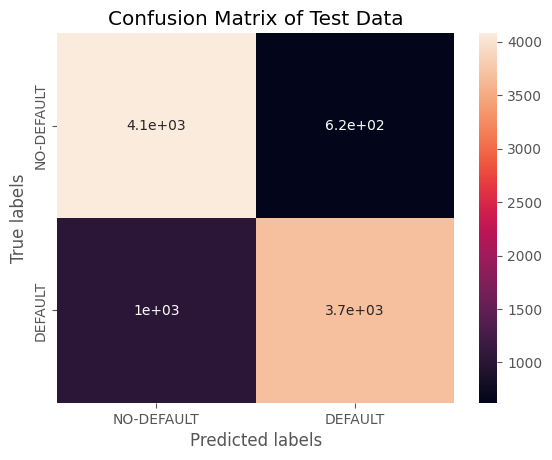

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test, log_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. **Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Logistic Regression was utilized. It's a classification method that forecasts the likelihood of a result that can only take one of two possible forms (i.e., dichotomy). It generates a logistic curve with a range of 0 to 1 values only.

In [ ]:
print(classification_report(y_test,log_test))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4703
           1       0.86      0.78      0.82      4703

    accuracy                           0.83      9406
   macro avg       0.83      0.83      0.82      9406
weighted avg       0.83      0.83      0.82      9406



From the above classification report we can deduce that:

* The model is able to correctly identify 75% of Default cases.
* The accuracy of the model is 75%.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# searching the best parameter
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
# Fit the Algorithm
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [ ]:
# Best parameter
print("The best parameters is found out to be :" ,grid_lr_clf.best_params_)
print("\nUsing ",grid_lr_clf.best_params_, " the recall score is: ", grid_lr_clf.best_score_)

The best parameters is found out to be : {'C': 100, 'penalty': 'l2'}

Using  {'C': 100, 'penalty': 'l2'}  the recall score is:  0.7822492733763383


In [ ]:
# take best parmeter and fit x train and y train
logit = LogisticRegression(C=0.01, fit_intercept=False, penalty='l2')
logit.fit(X_train, y_train)

LogisticRegression(C=0.01, fit_intercept=False)

In [ ]:
# Predict the values
train_log_hp = logit.predict(X_train)
test_log_hp = logit.predict(X_test)

In [ ]:
# Check the accurracy of  of predict model
train_accuracy2 = accuracy_score(train_log_hp,y_train)
test_accuracy2 = accuracy_score(test_log_hp,y_test)

print("The accuracy on train data is ", train_accuracy2)
print("The accuracy on test data is ", test_accuracy2)

The accuracy on train data is  0.8275279995712984
The accuracy on test data is  0.8258558366999788


In [ ]:
# Check recall score
print(classification_report(y_test,test_log_hp))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      4703
           1       0.88      0.76      0.81      4703

    accuracy                           0.83      9406
   macro avg       0.83      0.83      0.83      9406
weighted avg       0.83      0.83      0.83      9406



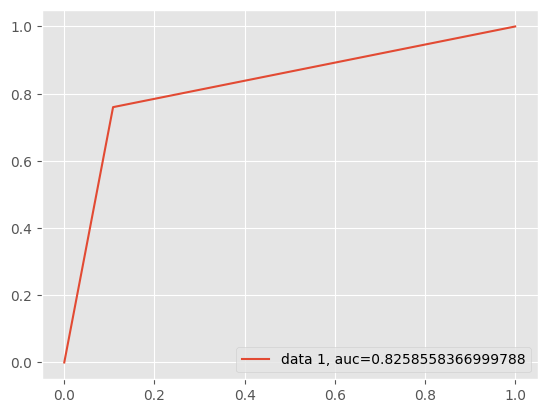

In [ ]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,test_log_hp)
auc = roc_auc_score(y_test,test_log_hp )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

I used Logistic regression algorithm to create the model. As I got not so good result.

The precision, recall, F1 and roc auc score on test data are: 0.88, 0.76 and 0.81

##### Which hyperparameter optimization technique have you used and why?

 I have used GridSearchCV to obtain the best parameters to improve upon my Logistic Regression Model.
 GridSearchCV which uses the gridSearch technique for finding the optimal hyperparameters to increase the model performance.

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* There is no increment in accuracy score after using hyperparameter tuning.

* The recall score has increased by 2% after using hyperparameter tuning.

### ML Model - 2 Decision Tree

In [ ]:
# ML Model-2 Implementation
clf_dt = DecisionTreeClassifier(criterion='gini', random_state=0, max_leaf_nodes=10)

# Fit the Algorithm
clf_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
# Predict the model
train_dt = clf_dt.predict(X_train)
test_dt = clf_dt.predict (X_test)

In [ ]:
# Check accuracy of our model
train_dt_acc = accuracy_score(train_dt,y_train)
test_dt_acc = accuracy_score(test_dt,y_test)
print('The accuracy of model train data set is',train_dt_acc)
print('The accuracy of model test data set is ',test_dt_acc)

The accuracy of model train data set is 0.752344461711591
The accuracy of model test data set is  0.7674888369126089


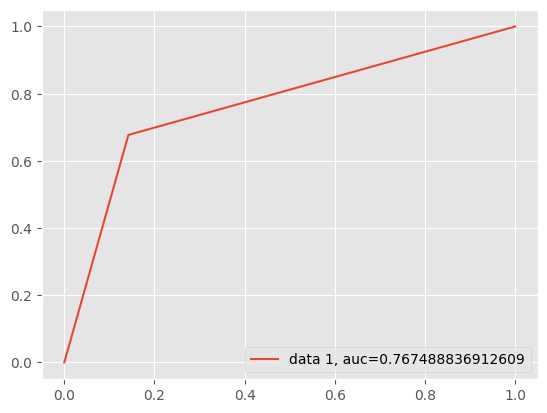

In [ ]:
# Auc_roc score
fpr, tpr, _ = roc_curve(y_test,test_dt)
auc = roc_auc_score(y_test,test_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Decision Tree Classifier is the second model I've employed. The most important variable and its value that produces the finest homogenous groupings of population are identified via the decision tree.

In [ ]:
# Check recall score of test date set
print(classification_report(y_test,test_dt))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      4703
           1       0.83      0.68      0.74      4703

    accuracy                           0.77      9406
   macro avg       0.78      0.77      0.77      9406
weighted avg       0.78      0.77      0.77      9406



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques ( GridSearch CV)
# giving parameters
dt_param = {'criterion':['gini','entropy','log_loss'], 'max_depth': np.arange(3, 15)}

dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = dt_param, cv=10, verbose=2, scoring='recall')

# Fit the Algorithm
dt_grid.fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.2s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.3s
[CV] END ........................criterion=gin

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='recall', verbose=2)

In [ ]:
# Check best parameter
print("The best parameters is found out to be :" ,dt_grid.best_params_)
print("\nUsing ",dt_grid.best_params_, " the recall score is: ", dt_grid.best_score_)

The best parameters is found out to be : {'criterion': 'gini', 'max_depth': 14}

Using  {'criterion': 'gini', 'max_depth': 14}  the recall score is:  0.7897939389555494


In [ ]:
# take the best parmeter
dt_tree_grid = DecisionTreeClassifier(criterion='gini', max_depth=13)
dt_tree_grid.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13)

In [ ]:
# predict model
dt_train_grid = dt_tree_grid.predict(X_train)
dt_test_grid = dt_tree_grid.predict(X_test)

In [ ]:
# Check accuracy of our model
dt_train_grid_acc = accuracy_score(dt_train_grid,y_train)
dt_test_grid_acc = accuracy_score(dt_test_grid,y_test)
print('The accuracy of modl of hyperparmeter training is ', dt_train_grid_acc)
print('The acccuracy of modal of hyperparmeter test is ',dt_test_grid_acc)

The accuracy of modl of hyperparmeter training is  0.9054177160923852
The acccuracy of modal of hyperparmeter test is  0.7770571975334892


[[17228  1433]
 [ 2097 16564]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

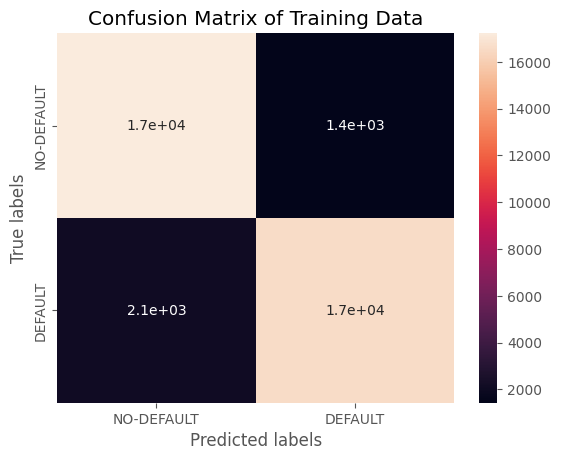

In [ ]:
# Check metrix analysis by heatmap
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_train,dt_train_grid)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3649 1054]
 [1043 3660]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

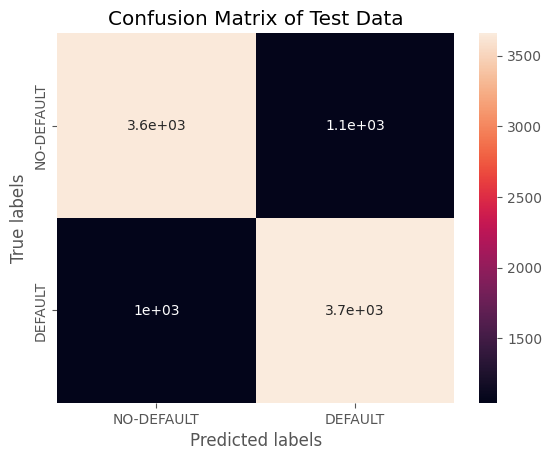

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test,dt_test_grid)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Check evaluation matrix score
print(classification_report(y_test,test_dt))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      4703
           1       0.83      0.68      0.74      4703

    accuracy                           0.77      9406
   macro avg       0.78      0.77      0.77      9406
weighted avg       0.78      0.77      0.77      9406



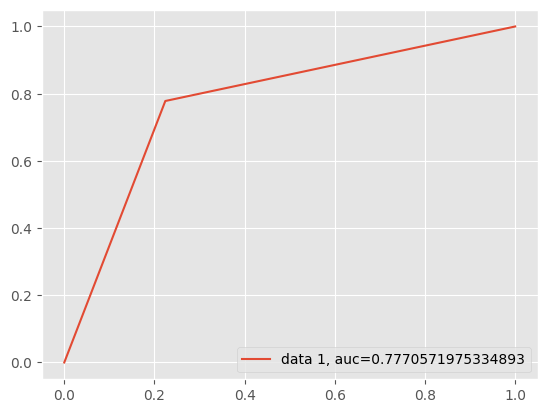

In [ ]:
# Check auc_roc curve by graph
fpr, tpr, _ = metrics.roc_curve(y_test,dt_test_grid)
auc = metrics.roc_auc_score(y_test,dt_test_grid)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Explain the ML Model used and it's performance

I used decision tree Classifier algorithm to create the model. As I got not so good result similar to Logistic Regression.

The precision, recall, F1 and roc auc score on test data are: 0.83, 0.68, 0.74 and 0.77

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the gridSearch technique for finding the optimal hyperparameters to increase the model performance.

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

### ML Model - 3  Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The third model I used was Random Forest. Random Forest develops several trees in contrast to the CART model's one tree. We build trees from the subsets of the original dataset. These subsets could only include some of the columns and rows. We say that a tree "votes" for a class when it offers a classification to classify a new object based on features. Regression uses a forest to pick the classification that obtained the most votes (out of all the trees in the forest) by averaging the results from numerous trees.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
train_rf = rf_clf.predict(X_train)
test_rf  = rf_clf.predict(X_test)

In [ ]:
train_accuracy_rf = accuracy_score(train_rf, y_train)
test_accuracy_rf = accuracy_score(test_rf, y_test)
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9996784738224104
The accuracy on test data is  0.8235169041037635


[[18653     8]
 [    4 18657]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

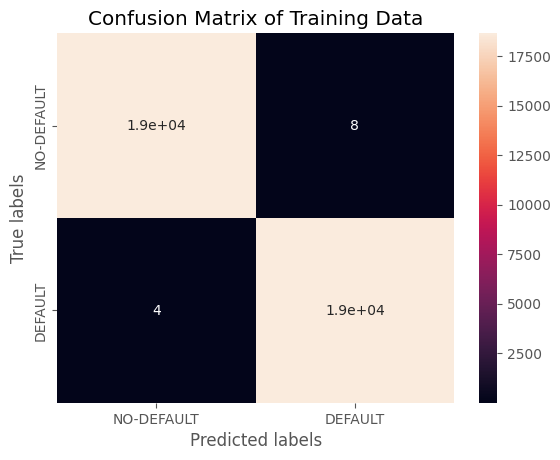

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_train, train_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3958  745]
 [ 915 3788]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

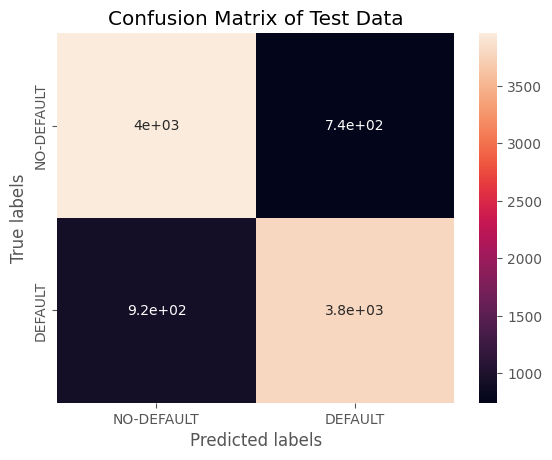

In [ ]:
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test,test_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(y_test,test_rf))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      4703
           1       0.84      0.81      0.82      4703

    accuracy                           0.82      9406
   macro avg       0.82      0.82      0.82      9406
weighted avg       0.82      0.82      0.82      9406



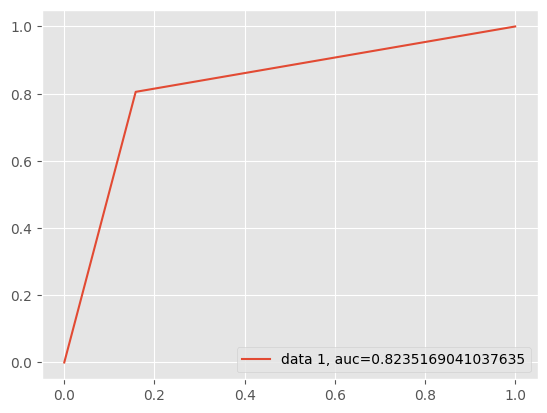

In [ ]:
fpr, tpr, _ = roc_curve(y_test,test_rf)
auc = roc_auc_score(y_test,test_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'criterion':['gini','entropy','log_loss'],'n_estimators': [5,10], 'max_depth': [3,15]}
# Fit the Algorithm
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train , y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 15], 'n_estimators': [5, 10]},
             scoring='accuracy', verbose=3)

In [ ]:
# Check the best parmeter
print("The best parameters is found out to be :" ,grid_rf_clf)
print("\nUsing ",grid_rf_clf.best_params_, " the recall score is: ", grid_rf_clf.best_score_)

The best parameters is found out to be : GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 15], 'n_estimators': [5, 10]},
             scoring='accuracy', verbose=3)

Using  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 10}  the recall score is:  0.8081580967848847


In [ ]:
# run model with best best parmeter
rf_grid_clf = RandomForestClassifier(criterion='gini', max_depth=15, n_estimators=10)
rf_grid_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=10)

In [ ]:
# predict model
train_rf_grid = rf_grid_clf.predict(X_train)
test_rf_grid = rf_grid_clf.predict(X_test)

In [ ]:
# Check the accuracy of our test model
train_rf_clf= accuracy_score(train_rf_grid, y_train)
test_rf_clf = accuracy_score(test_rf_grid, y_test)
print('The accuracy of train set is ',train_rf_clf)
print('The accuracy of test set is ',test_rf_clf)

The accuracy of train set is  0.9293446224746799
The accuracy of test set is  0.8023601956198171


[[17666   995]
 [ 1642 17019]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

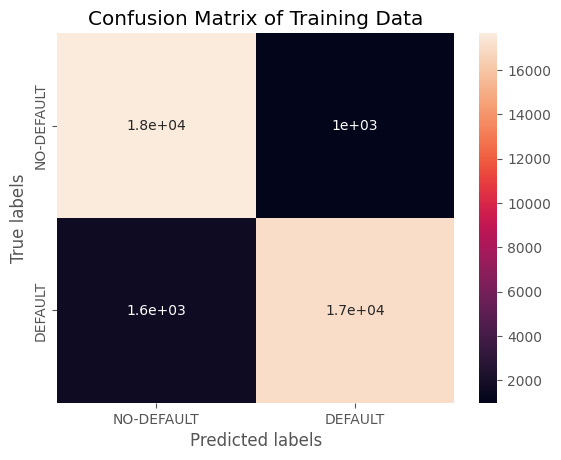

In [ ]:
# Training confusion matrix
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_train,train_rf_grid)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3747  956]
 [ 903 3800]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

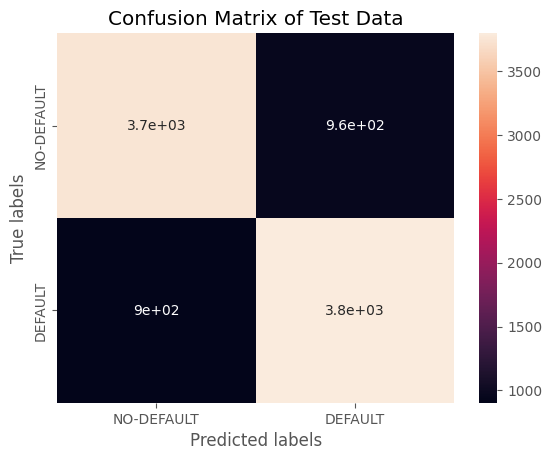

In [ ]:
# Testing Confusion Matrix
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test,test_rf_grid)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Check the matrix score
print(classification_report(y_test,test_rf_grid))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4703
           1       0.80      0.81      0.80      4703

    accuracy                           0.80      9406
   macro avg       0.80      0.80      0.80      9406
weighted avg       0.80      0.80      0.80      9406



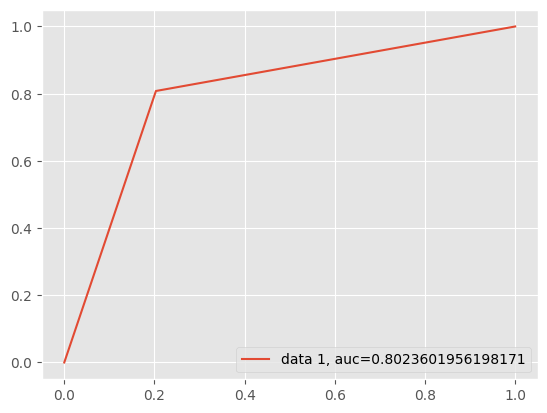

In [ ]:
# Check the auc_roc curve
fpr, tpr, _ = roc_curve(y_test,test_rf_grid)
auc = roc_auc_score(y_test,test_rf_grid )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the gridSearch technique for finding the optimal hyperparameters to increase the model performance.

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


I used Random Forest Classifier algorithm to create the model. As I got not so good result similar to Logistic Regression.

The precision, recall, F1 and roc auc score on test data are: 0.80, 0.81, 0.80 and 0.80

### ML Model - 4 XGBoost

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [ ]:
# giving parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
#training our model
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

[11:54:49] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
#Execution time of the model
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(seconds=7, microseconds=340588)

In [ ]:
#now predicting our model on train set
train_class_preds_probs=xg.predict(dtrain)
#now predicting our model on test set
test_class_preds_probs =xg.predict(dtest)

In [ ]:
len(train_class_preds_probs)

37322

In [ ]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [ ]:
test_class_preds_probs[:20]

array([0.61627245, 0.3339872 , 0.31077695, 0.16801603, 0.2549863 ,
       0.40579885, 0.20907043, 0.22639848, 0.1608354 , 0.4912892 ,
       0.3140466 , 0.24526419, 0.55525625, 0.7153938 , 0.43308917,
       0.10961648, 0.5347619 , 0.42327878, 0.24251115, 0.48746252],
      dtype=float32)

In [ ]:
# Check accuracy of train or test model
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.8637532822463962
The accuracy on test data is  0.8275568785881352


In [ ]:
# Check the matrix score
print(classification_report(y_test,test_class_preds ))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4703
           1       0.83      0.82      0.83      4703

    accuracy                           0.83      9406
   macro avg       0.83      0.83      0.83      9406
weighted avg       0.83      0.83      0.83      9406



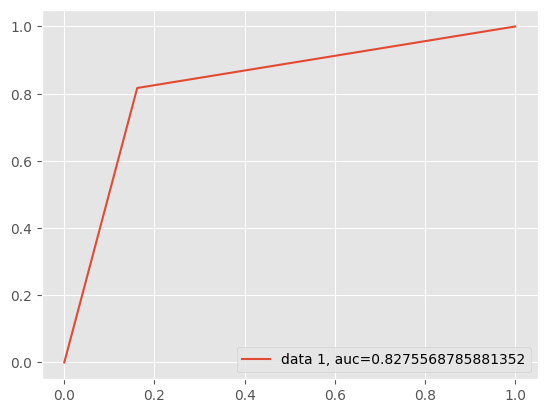

In [ ]:
# Check the auc and roc curve
fpr, tpr, _ = metrics.roc_curve(y_test,test_class_preds)
auc = metrics.roc_auc_score(y_test,test_class_preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques ( GridSearch CV)
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, # Fit the Algorithm
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

# Predict on the model

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [ ]:
# Check the best of xgb boost score
gsearch1.best_score_

0.8120440741823378

In [ ]:
# run with best estimator
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Predict on the model
train_class_pred = optimal_xgb.predict(X_train)
test_class_pred = optimal_xgb.predict(X_test)

In [ ]:
# Check accuracy score
train_accuracy_xgb_tuned = accuracy_score(train_class_pred,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9523337441723381
The accuracy on test data is  0.8177758877312353


[[18194   467]
 [ 1312 17349]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

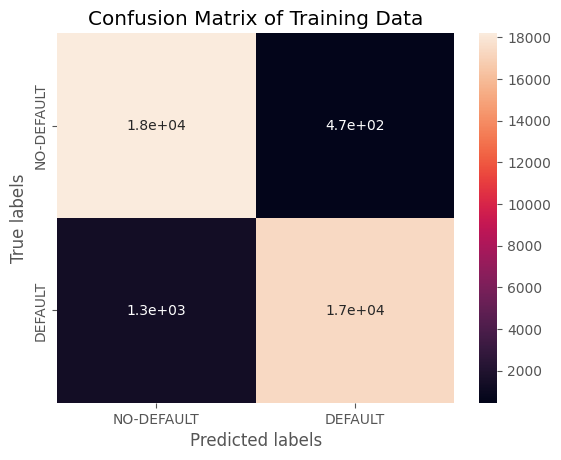

In [ ]:
# Training Confusion matrix
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_train,train_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of Training Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3730  973]
 [ 741 3962]]


[Text(0, 0.5, 'NO-DEFAULT'), Text(0, 1.5, 'DEFAULT')]

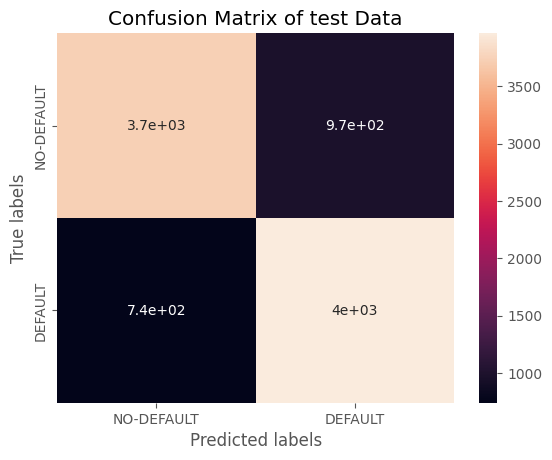

In [ ]:
# Testing confusion matrix
labels = ['NO-DEFAULT', 'DEFAULT']
cm = confusion_matrix(y_test,test_class_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix of test Data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      4703
           1       0.80      0.84      0.82      4703

    accuracy                           0.82      9406
   macro avg       0.82      0.82      0.82      9406
weighted avg       0.82      0.82      0.82      9406



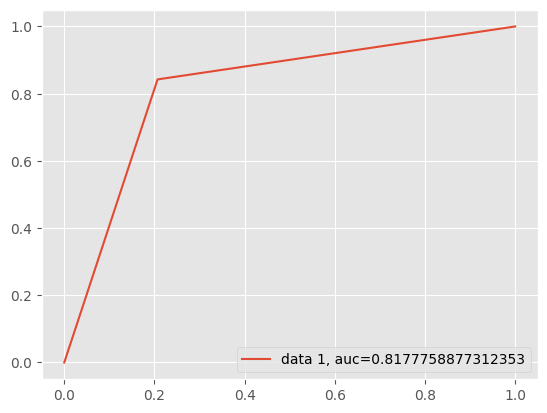

In [ ]:
fpr, tpr,_ = metrics.roc_curve(y_test,test_class_pred)
auc = metrics.roc_auc_score(y_test,test_class_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used XGBoost Classifier algorithm to create the model. As I got notso good result.

The precision, recall, F1 and roc auc score on test data are: 0.80, 0.84, 0.82 and 0.81

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the gridSearch technique for finding the optimal hyperparameters to increase the model performance.

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

### Ml Model - 5 K-Nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#fit the parameter
param_grid = {'n_neighbors' : [3,4]}
knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1, verbose = 3, cv = 4)
#training model
knn.fit(X_train, y_train)


Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4]}, verbose=3)

In [ ]:
# best parameter
knn.best_params_

{'n_neighbors': 4}

In [ ]:
# Predict tha model
y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [ ]:
# Check accuracy of model
train_accuracy_knn = accuracy_score(y_pred_knn_train,y_train)
test_accuracy_knn = accuracy_score(y_pred_knn_test,y_test)

print("The accuracy on train data is ",train_accuracy_knn)
print("The accuracy on test data is ",test_accuracy_knn)

The accuracy on train data is  0.8842237822196024
The accuracy on test data is  0.8123538167127365


In [ ]:
# Check matrix score
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      4703
           1       0.88      0.72      0.79      4703

    accuracy                           0.81      9406
   macro avg       0.82      0.81      0.81      9406
weighted avg       0.82      0.81      0.81      9406



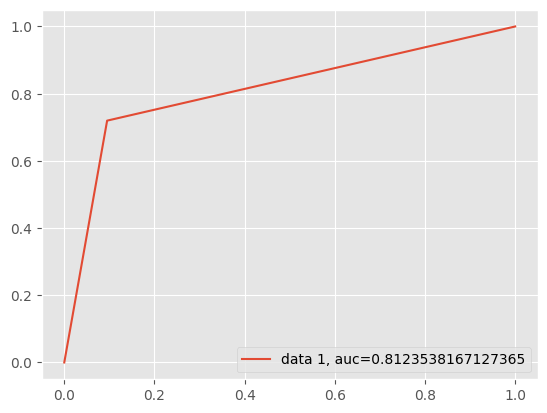

In [ ]:
# Check roc_auc curve
fpr, tpr,_ =metrics.roc_curve(y_test,y_pred_knn_test)
auc = metrics.roc_auc_score(y_test,y_pred_knn_test )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

I used K nearest neighbors Classifier algorithm to create the model. As I got not so good result similar to Logistic Regression.

The precision, recall, F1 and roc auc score on test data are: 0.88, 0.72, 0.79 and 0.89

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the gridSearch technique for finding the optimal hyperparameters to increase the model performance.

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The different assessment metrics for categorization issues include:

* Accuracy - Accuracy is simply the proportion of accurately predicted events. Accuracy performs a decent job of balancing specificity and sensitivity, recall and precision, as long as classes are roughly balanced (equal numbers of dog and not-dog photos in the prior example).

* Confusion Matrix: The Confusion Matrix is a performance measurement for classification problems in machine learning in which there can be two or more classes output. It is a table with actual and predicted value combinations. The table that is frequently used to describe the performance of a classification model on a set of test data for which the true values are known is referred to as a confusion matrix. It is extremely helpful for determining the AUC-ROC curves, precision, recall, and accuracy.

* Recall /senstivity :True Positive Rate is another name for recall and sensitivity. It is the percentage of genuine "YES" votes that were placed in the appropriate bin. In essence, this provides sensitivity/recall/TPR a very particular use case: utilize it when each instance of what you're seeking for is too valuable to let go.

* Precision: What percentage of the things the model flagged as YES are actually correct?

* F1-Score - F1 score is the harmonic average of recall and precision, taking values between 0 and 1.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The K nearest neighbor model seems to be the best choice for this dataset as it has the highest score in all the metrics (Accuracy, Precision, Recall, F1 and AUC). As shown in figure table:

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Logistic'),
  Text(1, 0, 'LogisticGSCV'),
  Text(2, 0, 'Decision_Tree'),
  Text(3, 0, 'Decision_TreeGSCV'),
  Text(4, 0, 'Random_Forest'),
  Text(5, 0, 'Random_ForestGSCV'),
  Text(6, 0, 'XGBoost'),
  Text(7, 0, 'XGBoostGCV'),
  Text(8, 0, 'KnnGCV')])

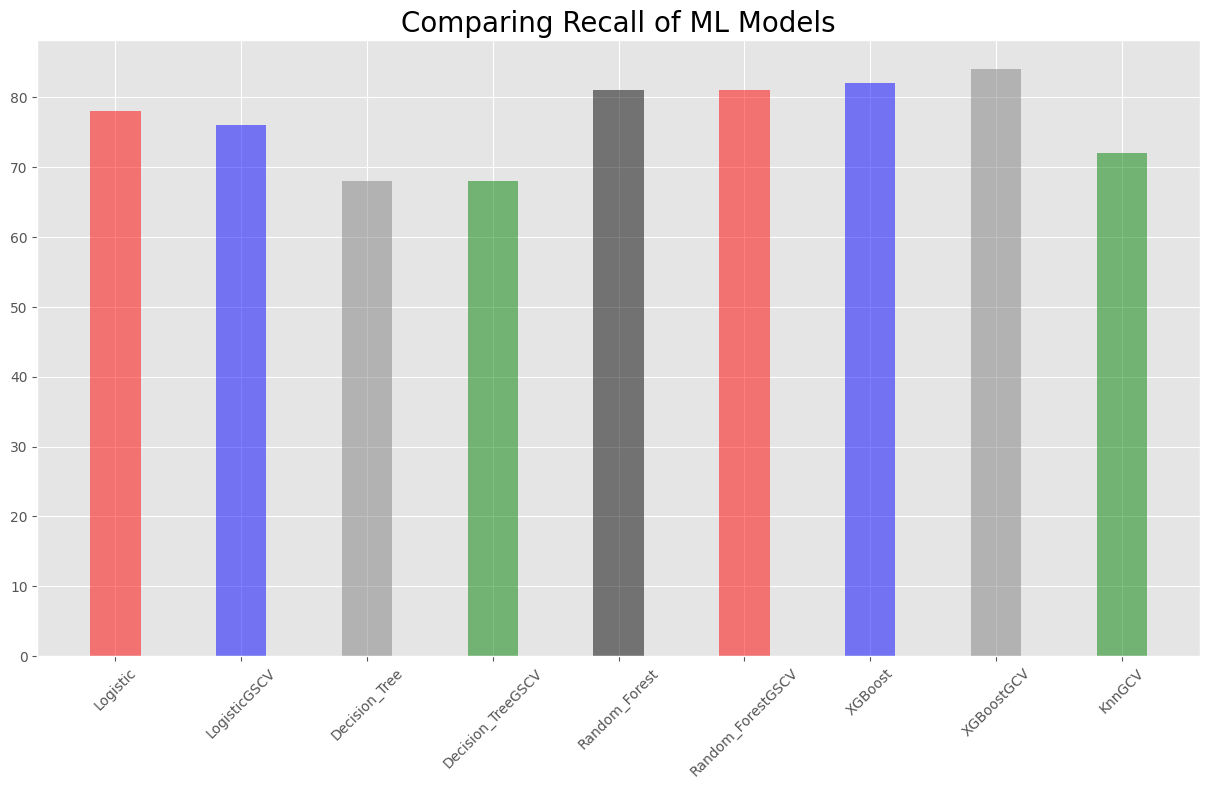

In [ ]:
data = {'Logistic':78, 'LogisticGSCV': 76,
                'Decision_Tree':68, 'Decision_TreeGSCV':68,
               'Random_Forest': 81, 'Random_ForestGSCV': 81,
                'XGBoost': 82 , 'XGBoostGCV':84 , 'KnnGCV': 72}
courses = list(data.keys())
values = list(data.values())
plt.figure(figsize=(15,8))
plt.title('Comparing Recall of ML Models',fontsize=20)
colors=['red','blue','grey','green','black']
plt.bar(courses, values, color =colors,alpha=0.5,width = 0.4)
plt.xticks(rotation = 45)

**Given that the XGBoost model gets the greatest scores across all criteria (Accuracy, Precision, Recall, F1, and AUC), it appears to be the best option for this dataset. According to the figure table**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Create a SHAP Explainer object
explainer = shap.Explainer(xg)

# Calculate SHAP values for all features
shap_values = explainer(X_test)

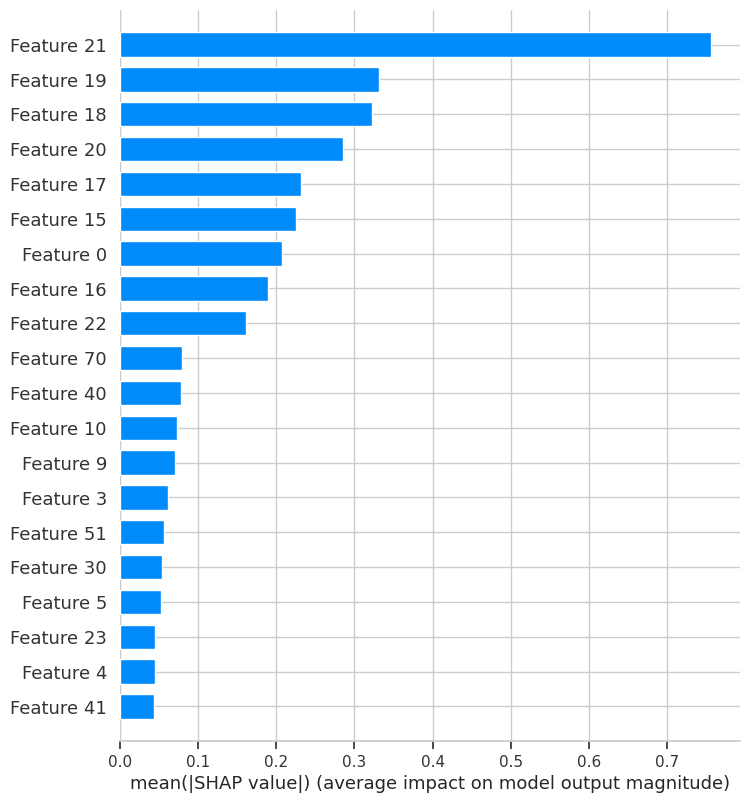

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

The total significance of each feature in a machine learning model is displayed in a SHAP summary graphic. It may be used to determine the key characteristics that are impacting the model's predictions and to learn more about those characteristics.

We can observe that the two most crucial features to forecast default are Pay_sept and Marriage.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this assignment, we had to categorize and forecast if a credit card customer is likely to fall behind on their payments. For credit card firms, this issue is crucial since it enables them to spot dangerous borrowers and take the necessary precautions to reduce their losses.

* In the dataset, there are around 22% defaulters and 78% non-defaulters.
* Compared to women, men default somewhat more frequently.
* Customers who are younger and older have greater default rates.
* The rate of defaults rises in tandem with the credit usage rate.
* Chances of default rise as the number of late payments rises.
* Those who have not paid anything in prior months have a greater default rate.
* SMOTE was utilized to balance out any data imbalances after data preparation.
* For forecasting customer default, the XGBoost model fared best, with the maximum accuracy (0.95), recall (0.84), F1 (0.82), and auc (0.81).
* The most crucial factors for forecasting customer default, according to a feature significance analysis employing SHAP values, were PAY_1, Marriage, Education, and so on.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***